# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 5. Компьютерное зрение & генеративные модели


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 120 баллов
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
# При необходимости установите библиотеки, например, раскомментируйте строку ниже
# !pip install torchinfo

In [2]:
import warnings
from typing import Union

import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import ConcatDataset, DataLoader
from torchsummary import summary
from typing import Callable, List, Dict
from collections import defaultdict
import time
from typing import Tuple
import numpy as np
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix, accuracy_score
import os
from pathlib import Path



sns.set(font_scale=1, style="darkgrid", palette="Set2")
warnings.simplefilter("ignore")

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


Перед выполнением задания обязательно посмотрите <a href="https://thetahat.ru/files/ad/main/5/lec5.pdf" target="_blank">презентацию</a> и <a href="https://thetahat.ru/files/ad/main/5/cv_classification" target="_blank">ноутбук</a> про сверточные сети и классификацию, а так же <a href="https://thetahat.ru/files/ad/main/5/lec5_2.pdf" target="_blank">презентацию</a> и <a href="https://thetahat.ru/files/ad/main/5/cv_complex_examples" target="_blank">ноутбук</a> про перенос стиля и генеративные сети.

&#x2757; **Весь код работы с библиотекой PyTorch необходимо написать самостоятельно, без использования ИИ-инструментов.** Но можно использовать код из ноутбуков, рассказанных на занятии. Можно использовать ИИ-инструменты для написания технического кода (например, построение графиков), оформления ранее написанного кода и в качестве справки. Выводы необходимо делать самостоятельно.

---
### Задача 1. Классификация MNIST


В данной задаче вам нужно провести сравнительный анализ сверточных нейросетей с различными параметрами на датасета рукописных цифр MNIST. С этим датасетом вы уже познакомились в <a href="https://thetahat.ru/courses/ad/main/4/ad_task4_part1">предыдущем задании</a>. Классификация в MNIST значительно проще, чем в CIFAR, рассмотренном на <a href="https://thetahat.ru/files/ad/main/5/cv_classification" target="_blank">занятии</a>, поэтому ваша задача — достичь **на валидации** хотя бы одной из моделей точности 97%. Вы можете свободно использовать код с занятия.

> Использования слоев с семинара (свертка, pooling) более чем достаточно для достижения 97% точности на тесте. Также не делайте сеть глубокой.

> Тестируйте работоспособность кода на CPU с небольшим количеством итераций. Если все работает, и хочется ускорить процесс, переходите на GPU.

Следуйте указаниям ниже.

Загрузим датаcет из `torchvision.datasets`.

In [15]:
# Данные для обучения
train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
# Данные для тестирования
val_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)
# Классы объектов в датасете
num_classes = 10
classes_list = [str(i) for i in range(num_classes)]

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 57.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.70MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.7MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.55MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Визуализируйте несколько картинок с соответствующими метками из датасета.

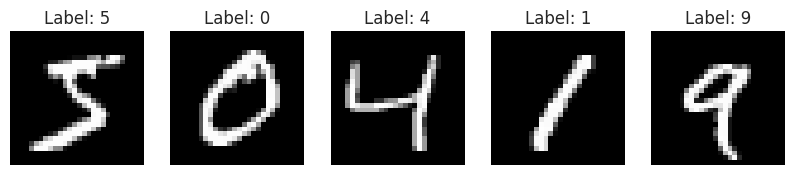

In [5]:
num_images = 5
images, labels = zip(*[train_dataset[i] for i in range(num_images)])

plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')

plt.show()

Создайте генераторы батчей.

In [18]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True)

**Эксперимент 1.** Создайте хотя бы 5 сверточных нейросетей с разным количеством линейных и сверточных слоев. Должен присутствовать хотя бы 1 сверточный слой и хотя бы 1 линейный слой. Для каждой посмотрите количество параметров с помощью `torchinfo.summary`.

In [7]:
class SimpleCNN1(nn.Module):
    def __init__(self):
        super(SimpleCNN1, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        layers.append(nn.Linear(16 * 14 * 14, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN1().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
           Flatten-4                 [-1, 3136]               0
            Linear-5                   [-1, 10]          31,370
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.24
Params size (MB): 0.12
Estimated Total Size (MB): 0.36
----------------------------------------------------------------


In [8]:
class SimpleCNN2(nn.Module):
    def __init__(self):
        super(SimpleCNN2, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        layers.append(nn.Linear(32 * 14 * 14, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN2().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 32, 28, 28]           4,640
              ReLU-4           [-1, 32, 28, 28]               0
         MaxPool2d-5           [-1, 32, 14, 14]               0
           Flatten-6                 [-1, 6272]               0
            Linear-7                   [-1, 10]          62,730
Total params: 67,530
Trainable params: 67,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 0.26
Estimated Total Size (MB): 0.93
----------------------------------------------------------------


In [9]:
class SimpleCNN3(nn.Module):
    def __init__(self):
        super(SimpleCNN3, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=4, stride=4))
        layers.append(nn.Flatten())
        layers.append(nn.Linear(32 * 7 * 7, 100))
        layers.append(nn.Linear(100, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN3().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 32, 28, 28]           4,640
              ReLU-4           [-1, 32, 28, 28]               0
         MaxPool2d-5             [-1, 32, 7, 7]               0
           Flatten-6                 [-1, 1568]               0
            Linear-7                  [-1, 100]         156,900
            Linear-8                   [-1, 10]           1,010
Total params: 162,710
Trainable params: 162,710
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.60
Params size (MB): 0.62
Estimated Total Size (MB): 1.22
----------------------------------------------------------------


In [10]:
class SimpleCNN4(nn.Module):
    def __init__(self):
        super(SimpleCNN4, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.AvgPool2d(kernel_size=4, stride=4))
        layers.append(nn.Flatten())
        layers.append(nn.Linear(64 * 7 * 7, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN4().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 32, 28, 28]           4,640
              ReLU-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 64, 28, 28]          18,496
              ReLU-6           [-1, 64, 28, 28]               0
         AvgPool2d-7             [-1, 64, 7, 7]               0
           Flatten-8                 [-1, 3136]               0
            Linear-9                   [-1, 10]          31,370
Total params: 54,666
Trainable params: 54,666
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.39
Params size (MB): 0.21
Estimated Total Size (MB): 1.60
---------------------------------------------

In [11]:
class SimpleCNN5(nn.Module):
    def __init__(self):
        super(SimpleCNN5, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        layers.append(nn.Dropout(p=0.5))
        layers.append(nn.Linear(32 * 14 * 14, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN5().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 32, 28, 28]           4,640
              ReLU-4           [-1, 32, 28, 28]               0
         MaxPool2d-5           [-1, 32, 14, 14]               0
           Flatten-6                 [-1, 6272]               0
           Dropout-7                 [-1, 6272]               0
            Linear-8                   [-1, 10]          62,730
Total params: 67,530
Trainable params: 67,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.72
Params size (MB): 0.26
Estimated Total Size (MB): 0.98
----------------------------------------------------------------


In [12]:
class SimpleCNN6(nn.Module):
    def __init__(self):
        super(SimpleCNN6, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(16, 32, kernel_size=4, stride=2, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Flatten())
        layers.append(nn.Linear(6272, 100))
        layers.append(nn.Linear(100, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN6().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
            Conv2d-3           [-1, 16, 28, 28]           1,168
              ReLU-4           [-1, 16, 28, 28]               0
            Conv2d-5           [-1, 32, 14, 14]           8,224
              ReLU-6           [-1, 32, 14, 14]               0
           Flatten-7                 [-1, 6272]               0
            Linear-8                  [-1, 100]         627,300
            Linear-9                   [-1, 10]           1,010
Total params: 637,782
Trainable params: 637,782
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.43
Params size (MB): 2.43
Estimated Total Size (MB): 2.87
-------------------------------------------

Создадим 6 моделей:

In [13]:
models = [SimpleCNN1(), SimpleCNN2(), SimpleCNN3(), SimpleCNN4(), SimpleCNN5(), SimpleCNN6()]

Обучите сети, используя функцию потерь `nn.CrossEntropyLoss` и оптимизатор `torch.optim.SGD` с дефолтными параметрами.

In [5]:
def plot_histories(histories: List[Dict[str, Dict[str, list]]], names: List[str], fig_size = (14, 5)) -> None:
    """
    Визуализирует лосс и точность для нескольких моделей на одном графике.

    Параметры:
        histories (List[Dict[str, Dict[str, list]]]): Список историй обучения моделей.
            Каждая история должна содержать ключи "loss" и "acc" с подключами "train" и "val".
        names (List[str]): Список названий моделей для легенды.
        fig_size Tuple: развемер графика

    Возвращает:
        None
    """
    # Устанавливаем стиль "darkgrid" только для текущего графика
    with sns.axes_style("darkgrid"):
        # Цвета для графиков
        colors = ["darkblue", "lightcoral", "limegreen", "sandybrown", "yellow", "crimson", "darkgreen"]

        # Создаем фигуру с двумя подграфиками
        fig, axs = plt.subplots(1, 2, figsize=fig_size)

        # Определяем количество эпох для отображения (минимальное среди всех историй)
        epochs = np.min([len(h["loss"]["train"]) for h in histories])

        # Построение графиков для каждой модели
        for i, (history, name) in enumerate(zip(histories, names)):
            # График лосса
            axs[0].set_title("Лосс")
            axs[0].plot(
                history["loss"]["train"][:epochs],
                label=f"{name}",
                lw=2,
                c=colors[i],
                ls="--",
            )
            axs[0].plot(
                history["loss"]["val"][:epochs],
                lw=1.5,
                c=colors[i],
            )
            axs[0].set_xlabel("Номер эпохи")

            # График точности
            axs[1].set_title("Точность классификации")
            axs[1].plot(
                history["acc"]["train"][:epochs], label=f"{name}", lw=2, c=colors[i], ls="--"
            )
            axs[1].plot(history["acc"]["val"][:epochs], lw=1.5, c=colors[i])
            axs[1].set_xlabel("Номер эпохи")
            axs[1].legend()

        # Создаем фиктивные линии для легенды (train и val)
        dummy_lines = [
            axs[0].plot([], [], c="black", lw=2, ls="--")[0],
            axs[0].plot([], [], c="black", lw=1.5)[0],
        ]

        # Добавляем легенду для типов линий (train и val)
        for i in range(2):
            legend = axs[i].legend(loc=3 - i)  # Легенда для моделей
            axs[i].legend(dummy_lines, ["train", "val"], loc=4)  # Легенда для типов линий
            axs[i].add_artist(legend)  # Добавляем обе легенды на график

        plt.show()

In [6]:
def print_epoch(epoch, num_epochs, history, t):
    """
    Функция для вывода информации про эпоху.
    :param epoch: номер эпохи
    :param num_epochs: общее количество эпох
    :param history: (dict) accuracy и loss на обучении и валидации ("история" обучения)
    :param t: время эпохи в секундах
    """
    clear_output(wait=True)
    print("Эпоха {} из {}, затраченное время {:.3f} сек.".format(epoch + 1, num_epochs, t))
    print("  лосс на обучении: \t{:.6f}".format(history["loss"]["train"][-1]))
    print("  лосс на валидации: \t{:.6f}".format(history["loss"]["val"][-1]))
    print("  точность на обучении: \t\t{:.2f} %".format(history["acc"]["train"][-1] * 100))
    print("  точность на валидации: \t\t{:.2f} %".format(history["acc"]["val"][-1] * 100))

    # Строим графики лосса и точности
    plot_histories([history], ["Model"])


In [7]:
def update_history(
    history: Dict[str, Dict[str, list]], loss: float, acc: float, num_batches: int, mode: str
) -> None:
    """
    Обновляет историю обучения, добавляя в нее loss и accuracy для текущей эпохи.

    Параметры:
        history (Dict[str, Dict[str, list]]): Словарь с историей обучения.
        loss (float): Суммарный loss за эпоху.
        acc (float): Суммарная точность за эпоху.
        num_batches (int): Количество батчей в эпохе.
        mode (str): Режим обучения ("train" или "val").
    """
    # Нормализуем loss и accuracy по количеству батчей
    loss /= num_batches
    acc /= num_batches
    history["loss"][mode].append(loss)
    history["acc"][mode].append(acc)

In [8]:
def get_batch_loss(
    X_batch: torch.Tensor,
    y_batch: torch.Tensor,
    model: nn.Module,
    criterion: Callable,
    current_loss: float,
    current_acc: float,
) -> Tuple[torch.Tensor, float, float]:
    """
    Вычисляет loss и accuracy для одного батча (без backward pass).

    Параметры:
        X_batch (torch.Tensor): Батч входных данных.
        y_batch (torch.Tensor): Батч меток.
        model (nn.Module): Модель для обучения (выдает логиты).
        criterion (Callable): Функция потерь.
        current_loss (float): Текущий лосс за батч.
        current_acc (float): Текущая точность за батч.

    Возвращает:
        Tuple[torch.Tensor, float, float]: Лосс на батче, обновленные суммарные loss и accuracy.
    """
    # Перемещаем данные на устройство (GPU/CPU)
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)

    # Получаем логиты от модели
    logits = model(X_batch)

    # Вычисляем loss
    loss = criterion(logits, y_batch.long().to(device))

    # Сохраняем лоссы и точность
    current_loss += loss.detach().cpu().numpy()
    y_pred = logits.max(1)[1].detach().cpu().numpy()
    current_acc += np.mean(y_batch.cpu().numpy() == y_pred)
    return loss, current_loss, current_acc

In [9]:
def train(
    model: nn.Module,
    criterion: Callable,
    optimizer: optim.Optimizer,
    train_batch_gen: DataLoader,
    val_batch_gen: DataLoader,
    num_epochs: int = 40,
) -> Dict[str, Dict[str, list]]:
    """
    Обучает модель и возвращает историю обучения.

    Параметры:
        model (nn.Module): Модель для обучения.
        criterion (Callable): Функция потерь.
        optimizer (optim.Optimizer): Оптимизатор.
        train_batch_gen (DataLoader): Генератор батчей для обучения.
        val_batch_gen (DataLoader): Генератор батчей для валидации.
        num_epochs (int): Количество эпох (по умолчанию 40).

    Возвращает:
        Dict[str, Dict[str, list]]: История обучения, содержащая loss и accuracy для обучения и валидации.
    """
    history = defaultdict(lambda: defaultdict(list))

    for epoch in range(num_epochs):
        train_loss, val_loss = 0, 0
        train_acc, val_acc = 0, 0
        start_time = time.time()

        # ----------------------   ОБУЧЕНИЕ   ----------------------#
        model.train(True)

        # На каждой "эпохе" делаем полный проход по данным
        for X_batch, y_batch in train_batch_gen:

            # Вычисляем loss и accuracy для батча
            loss, train_loss, train_acc = get_batch_loss(
                X_batch, y_batch, model, criterion, train_loss, train_acc
            )

            # Обратный проход, вычисление градиентов
            loss.backward()
            # Шаг градиентного спуска для обновления оценок весов
            optimizer.step()
            # Зануление градиентов
            optimizer.zero_grad()

        # Обновляем историю обучения
        update_history(history, train_loss, train_acc, len(train_batch_gen), "train")

        # ----------------------   ВАЛИДАЦИЯ   ----------------------#
        model.train(False)

        # Контекстный менеджер, отключающий подсчет градиентов
        with torch.no_grad():
            # Полный проход по валидационному датасету
            for X_batch, y_batch in val_batch_gen:
                # Вычисляем loss и accuracy для батча
                _, val_loss, val_acc = get_batch_loss(
                    X_batch, y_batch, model, criterion, val_loss, val_acc
                )

        # Обновляем историю валидации
        update_history(history, val_loss, val_acc, len(val_batch_gen), "val")

        # Выводим информацию о текущей эпохе
        print_epoch(epoch, num_epochs, history, time.time() - start_time)

    return history

функция для обучения и визуализации модели

In [14]:
def train_model(model, num_iter = 20):
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters())
  return train(model.to(device), criterion, optimizer, train_loader, val_loader, num_iter)

List для сохраннения истории

In [16]:
history = [None] * 6

Последовательно обучаем модели

Эпоха 20 из 20, затраченное время 8.298 сек.
  лосс на обучении: 	0.305535
  лосс на валидации: 	0.287097
  точность на обучении: 		91.09 %
  точность на валидации: 		91.91 %


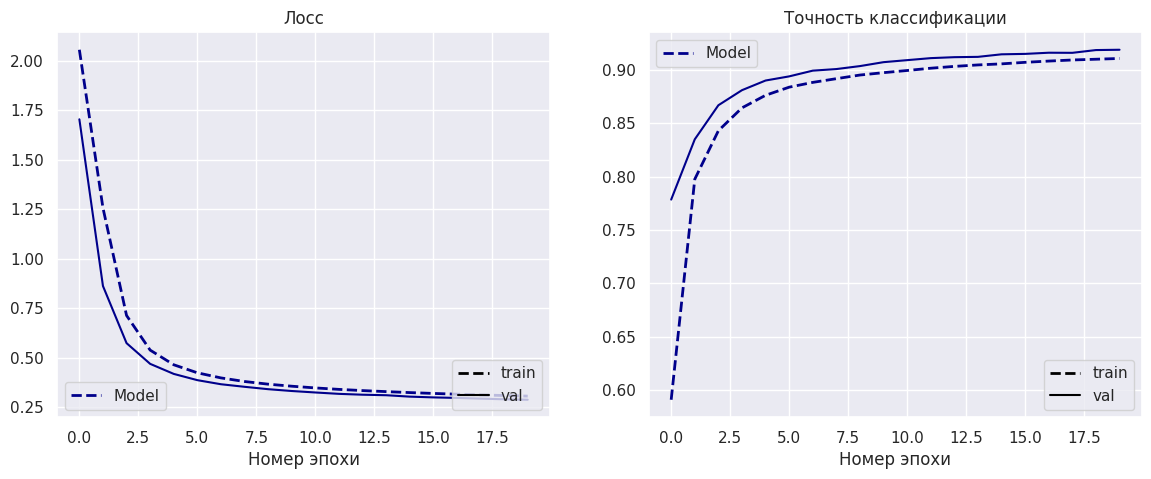

In [17]:
history[0] = train_model(models[0])

Эпоха 20 из 20, затраченное время 9.013 сек.
  лосс на обучении: 	0.278052
  лосс на валидации: 	0.262344
  точность на обучении: 		91.97 %
  точность на валидации: 		92.32 %


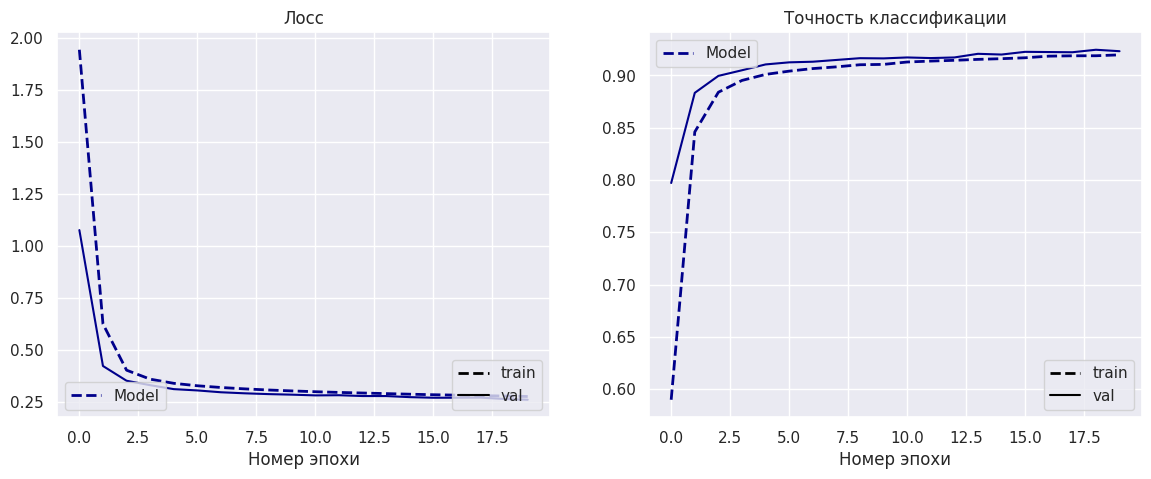

In [18]:
history[1] = train_model(models[1])

Эпоха 20 из 20, затраченное время 9.034 сек.
  лосс на обучении: 	0.253780
  лосс на валидации: 	0.241383
  точность на обучении: 		92.52 %
  точность на валидации: 		93.12 %


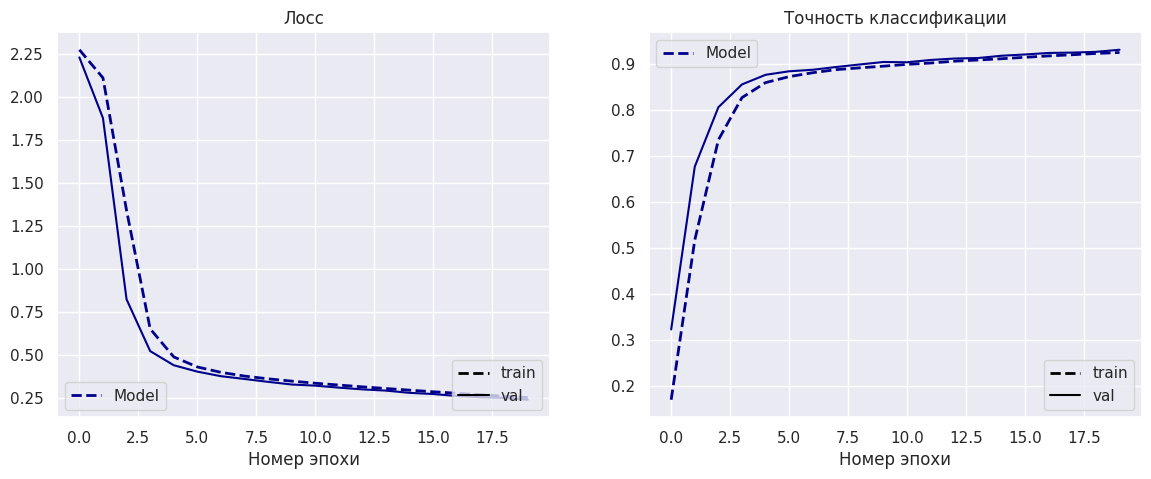

In [19]:
history[2] = train_model(models[2])

Эпоха 20 из 20, затраченное время 9.602 сек.
  лосс на обучении: 	0.323222
  лосс на валидации: 	0.303955
  точность на обучении: 		90.50 %
  точность на валидации: 		91.11 %


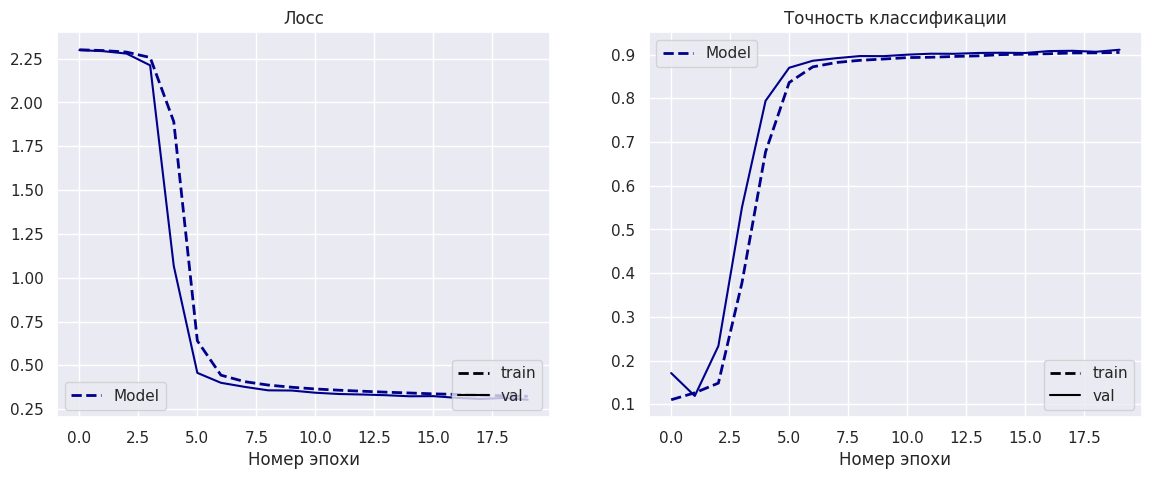

In [20]:
history[3] = train_model(models[3])

Эпоха 20 из 20, затраченное время 8.891 сек.
  лосс на обучении: 	0.317825
  лосс на валидации: 	0.256326
  точность на обучении: 		90.70 %
  точность на валидации: 		92.65 %


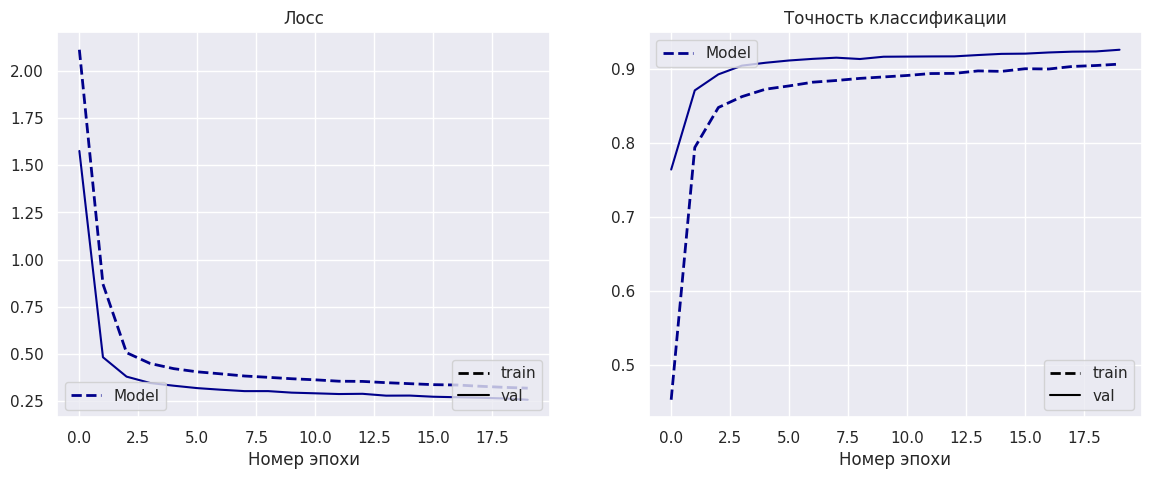

In [21]:
history[4] = train_model(models[4])

Эпоха 20 из 20, затраченное время 8.991 сек.
  лосс на обучении: 	0.276352
  лосс на валидации: 	0.260135
  точность на обучении: 		92.14 %
  точность на валидации: 		92.49 %


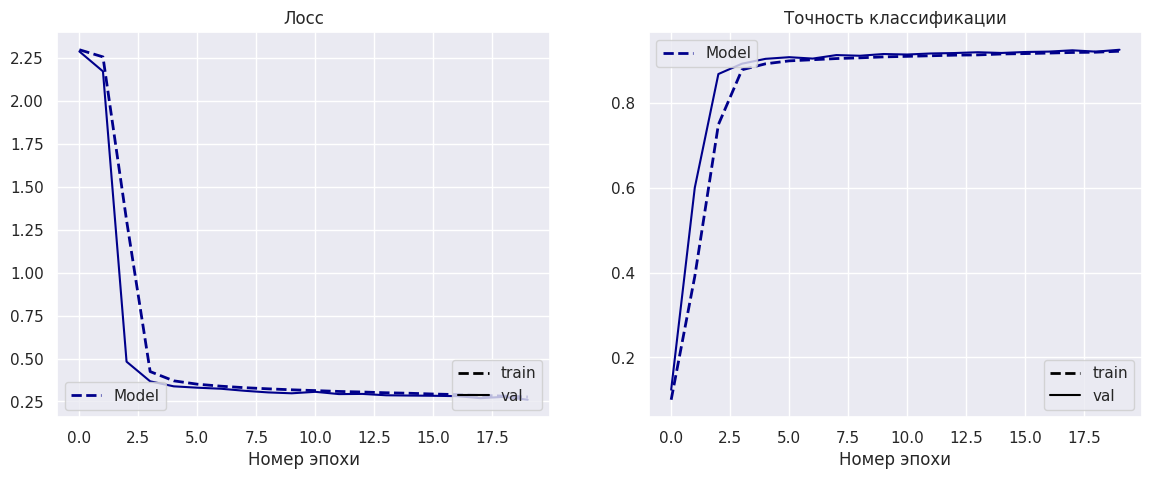

In [22]:
history[5] = train_model(models[5])

Постройте график лосса и график accuracy, где сравниваются все модели (на train и на val). Нужная функция есть в семинаре.

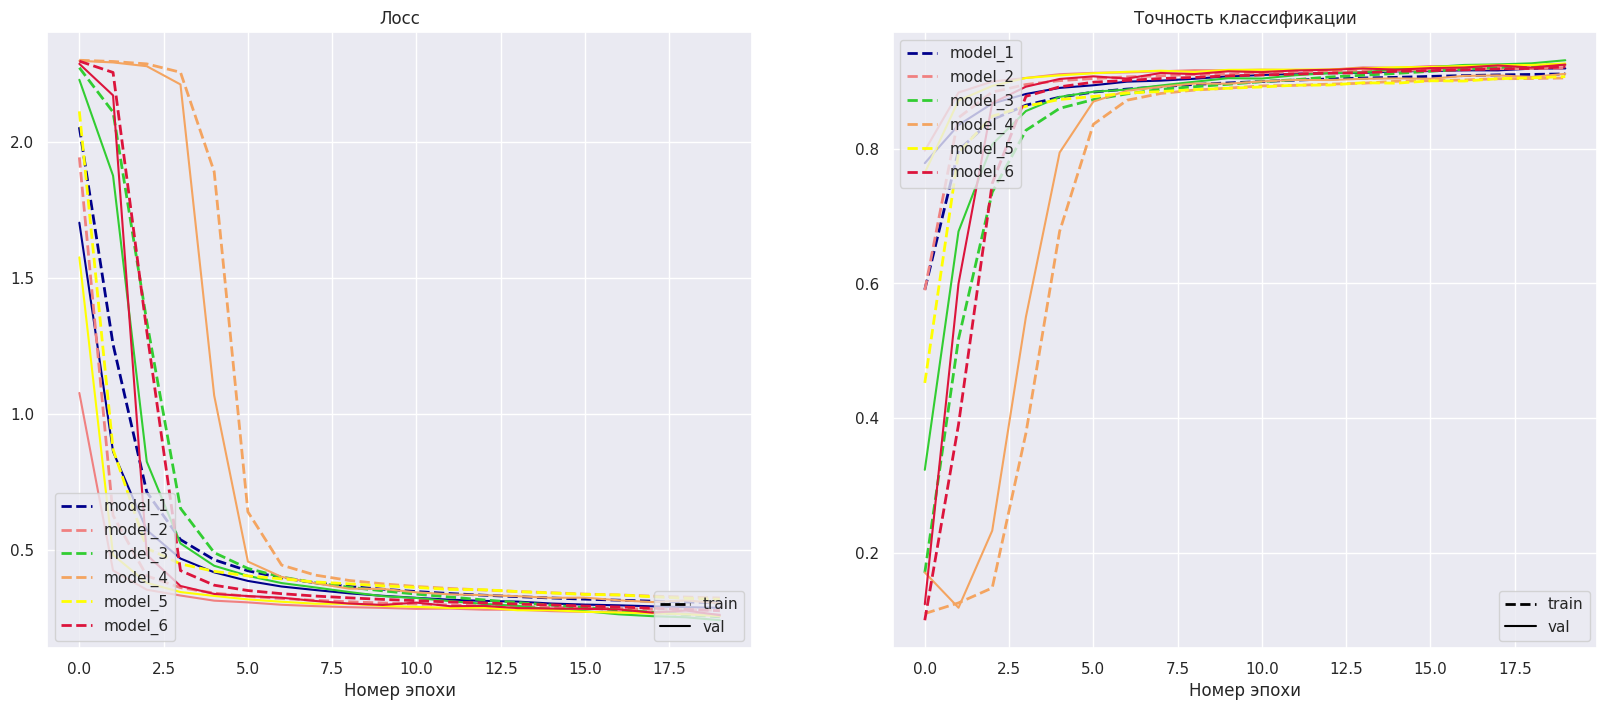

In [23]:
plot_histories([history[0], history[1], history[2], history[3], history[4], history[5]], \
               ["model_1", "model_2", "model_3", "model_4", "model_5", "model_6"], tuple([20, 8]))

Сделайте вывод. Как количество разных слоев влияет на качество и время обучения?

**Вывод по эксперименту 1:**

- Из 1 и 2 модели мы можем сделайть вывод что надо скорее не увеличивать количество линейных слоёв а добовлять свёрточные слои и разнообразить их

- 1 и 5 модель можно дообучить но уже видно что они отстают в скорости обучения => лучше выбрать другую модель как основную

- Из графика видно что лучше всего обобщает данные 2, 4 и 6

- В общем лучше всех результат показала 2 модель по точности + она довольно быстро обучилась

**Эксперимент 2.** Теперь выберите лучший вариант, зафиксируйте это количество сверточных и линейных слоев и обучите хотя бы 4 сверточных нейросети, варьируя размеры ядер сверток. Например, в разном порядке поставьте ядра 3x3, 5x5.

In [24]:
class SimpleCNN2_1(nn.Module):
    def __init__(self):
        super(SimpleCNN2_1, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        layers.append(nn.Linear(5408, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN2_1().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 32, 26, 26]          12,832
              ReLU-4           [-1, 32, 26, 26]               0
         MaxPool2d-5           [-1, 32, 13, 13]               0
           Flatten-6                 [-1, 5408]               0
            Linear-7                   [-1, 10]          54,090
Total params: 67,082
Trainable params: 67,082
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.60
Params size (MB): 0.26
Estimated Total Size (MB): 0.86
----------------------------------------------------------------


In [25]:
class SimpleCNN2_2(nn.Module):
    def __init__(self):
        super(SimpleCNN2_2, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=3))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(32, 64, kernel_size=7, stride=3, padding=7))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        layers.append(nn.Linear(3136, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN2_2().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             320
              ReLU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 64, 14, 14]         100,416
              ReLU-4           [-1, 64, 14, 14]               0
         MaxPool2d-5             [-1, 64, 7, 7]               0
           Flatten-6                 [-1, 3136]               0
            Linear-7                   [-1, 10]          31,370
Total params: 132,106
Trainable params: 132,106
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.74
Params size (MB): 0.50
Estimated Total Size (MB): 1.25
----------------------------------------------------------------


In [26]:
class SimpleCNN2_3(nn.Module):
    def __init__(self):
        super(SimpleCNN2_3, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=3))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(32, 64, kernel_size=7, stride=1, padding=7))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        layers.append(nn.Linear(25600, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN2_3().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             320
              ReLU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 64, 40, 40]         100,416
              ReLU-4           [-1, 64, 40, 40]               0
         MaxPool2d-5           [-1, 64, 20, 20]               0
           Flatten-6                [-1, 25600]               0
            Linear-7                   [-1, 10]         256,010
Total params: 356,746
Trainable params: 356,746
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 2.45
Params size (MB): 1.36
Estimated Total Size (MB): 3.82
----------------------------------------------------------------


In [27]:
class SimpleCNN2_4(nn.Module):
    def __init__(self):
        super(SimpleCNN2_4, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 48, kernel_size=4, stride=1, padding=3))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(48, 64, kernel_size=7, stride=1, padding=7))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        layers.append(nn.Linear(23104, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN2_4().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 48, 31, 31]             816
              ReLU-2           [-1, 48, 31, 31]               0
            Conv2d-3           [-1, 64, 39, 39]         150,592
              ReLU-4           [-1, 64, 39, 39]               0
         MaxPool2d-5           [-1, 64, 19, 19]               0
           Flatten-6                [-1, 23104]               0
            Linear-7                   [-1, 10]         231,050
Total params: 382,458
Trainable params: 382,458
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 2.54
Params size (MB): 1.46
Estimated Total Size (MB): 4.00
----------------------------------------------------------------


In [28]:
class SimpleCNN2_5(nn.Module):
    def __init__(self):
        super(SimpleCNN2_5, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 48, kernel_size=3, stride=1, padding=3))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(48, 96, kernel_size=8, stride=3, padding=4))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        layers.append(nn.Linear(2400, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(SimpleCNN2_5().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 48, 32, 32]             480
              ReLU-2           [-1, 48, 32, 32]               0
            Conv2d-3           [-1, 96, 11, 11]         295,008
              ReLU-4           [-1, 96, 11, 11]               0
         MaxPool2d-5             [-1, 96, 5, 5]               0
           Flatten-6                 [-1, 2400]               0
            Linear-7                   [-1, 10]          24,010
Total params: 319,498
Trainable params: 319,498
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.96
Params size (MB): 1.22
Estimated Total Size (MB): 2.19
----------------------------------------------------------------


In [29]:
history_1 = [None] * 6
models_1 = [None] * 6

Эпоха 20 из 20, затраченное время 8.967 сек.
  лосс на обучении: 	0.183270
  лосс на валидации: 	0.175698
  точность на обучении: 		94.80 %
  точность на валидации: 		95.15 %


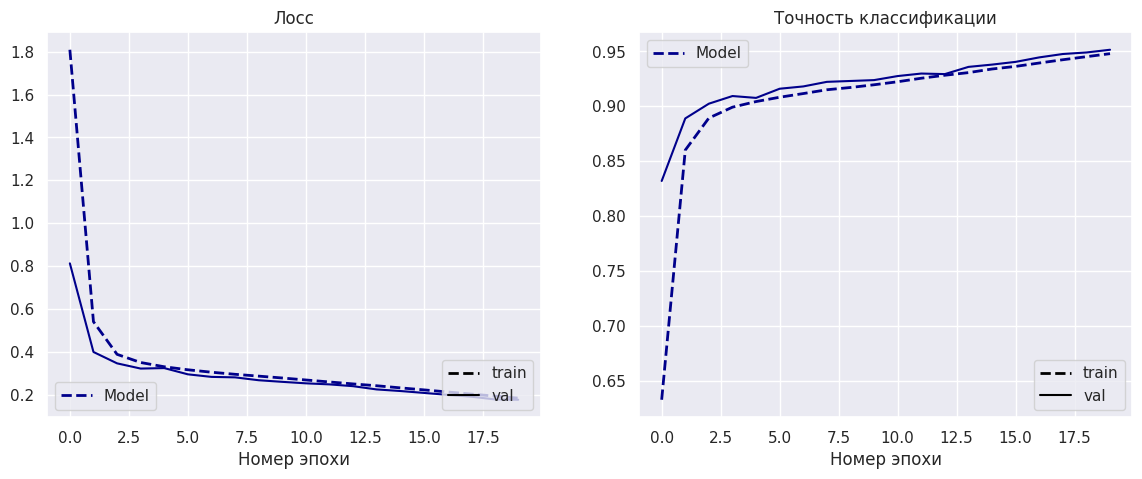

In [30]:
models_1[0] = SimpleCNN2_1()
history_1[0] = train_model(models_1[0])

Эпоха 20 из 20, затраченное время 9.532 сек.
  лосс на обучении: 	0.156529
  лосс на валидации: 	0.144129
  точность на обучении: 		95.48 %
  точность на валидации: 		95.79 %


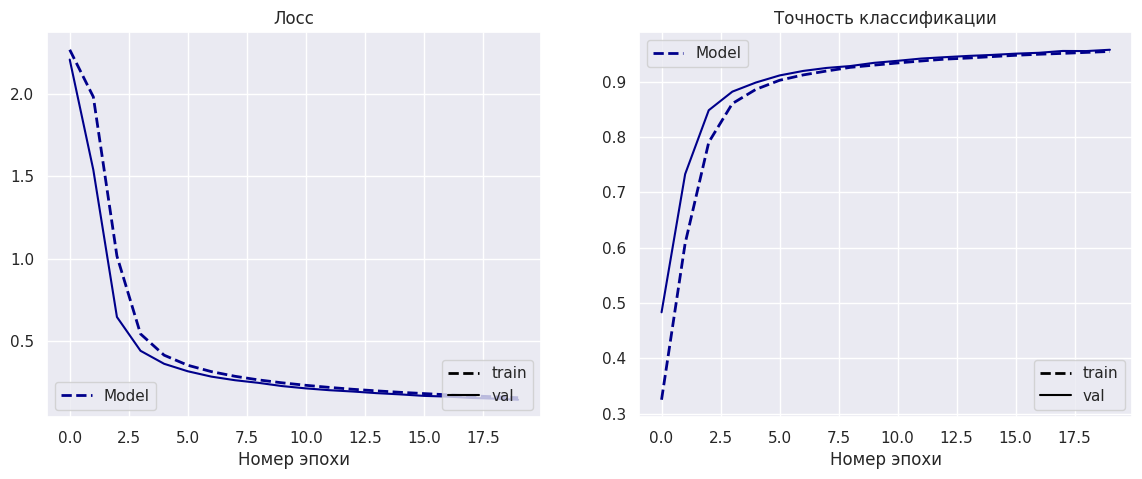

In [31]:
models_1[1] = SimpleCNN2_2()
history_1[1] = train_model(models_1[1])

Эпоха 20 из 20, затраченное время 20.960 сек.
  лосс на обучении: 	0.120918
  лосс на валидации: 	0.110388
  точность на обучении: 		96.57 %
  точность на валидации: 		96.87 %


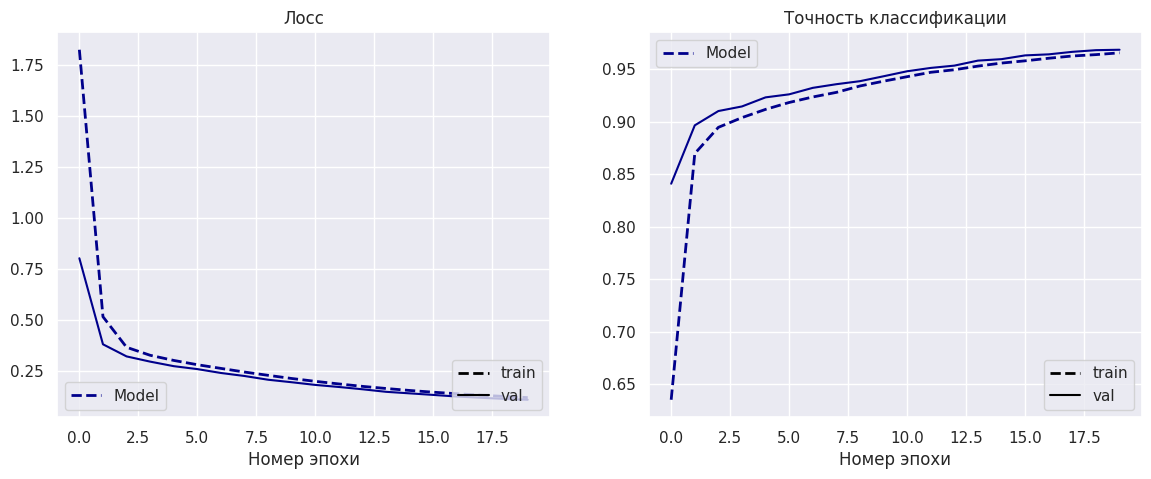

In [32]:
models_1[2] = SimpleCNN2_3()
history_1[2] = train_model(models_1[2])

Эпоха 20 из 20, затраченное время 31.242 сек.
  лосс на обучении: 	0.115190
  лосс на валидации: 	0.102322
  точность на обучении: 		96.76 %
  точность на валидации: 		97.23 %


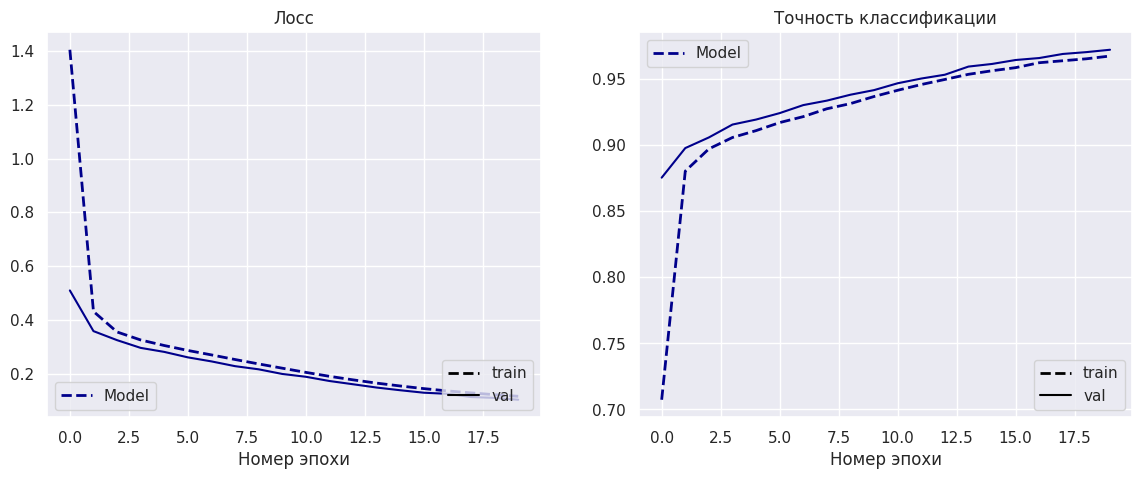

In [33]:
models_1[3] = SimpleCNN2_4()
history_1[3] = train_model(models_1[3])

Эпоха 30 из 30, затраченное время 11.878 сек.
  лосс на обучении: 	0.095519
  лосс на валидации: 	0.089285
  точность на обучении: 		97.20 %
  точность на валидации: 		97.39 %


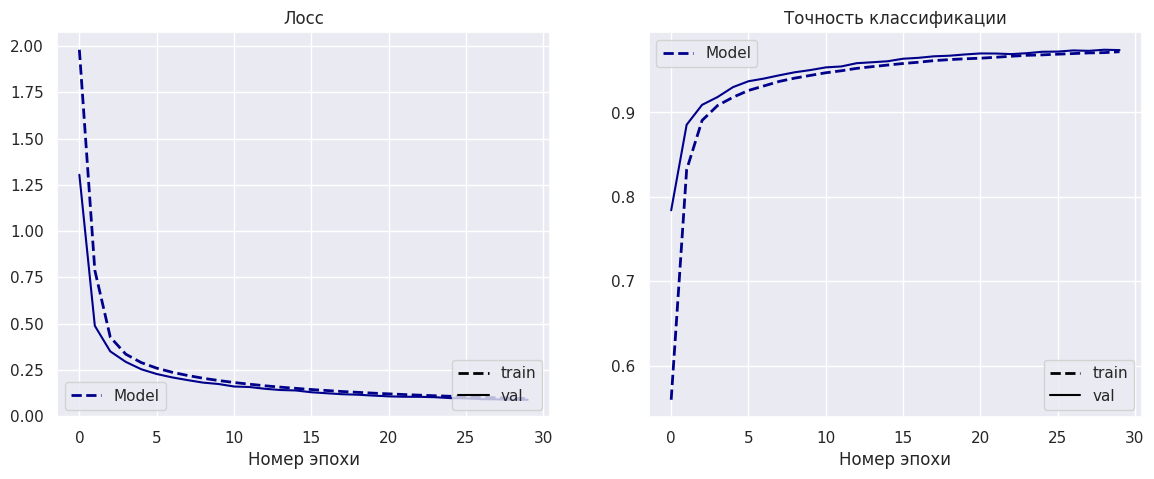

In [34]:
models_1[4] = SimpleCNN2_5()
history_1[4] = train_model(models_1[4], 30)

Постройте график лосса и график accuracy, где сравниваются все модели этого эксперимента (на train и на val).

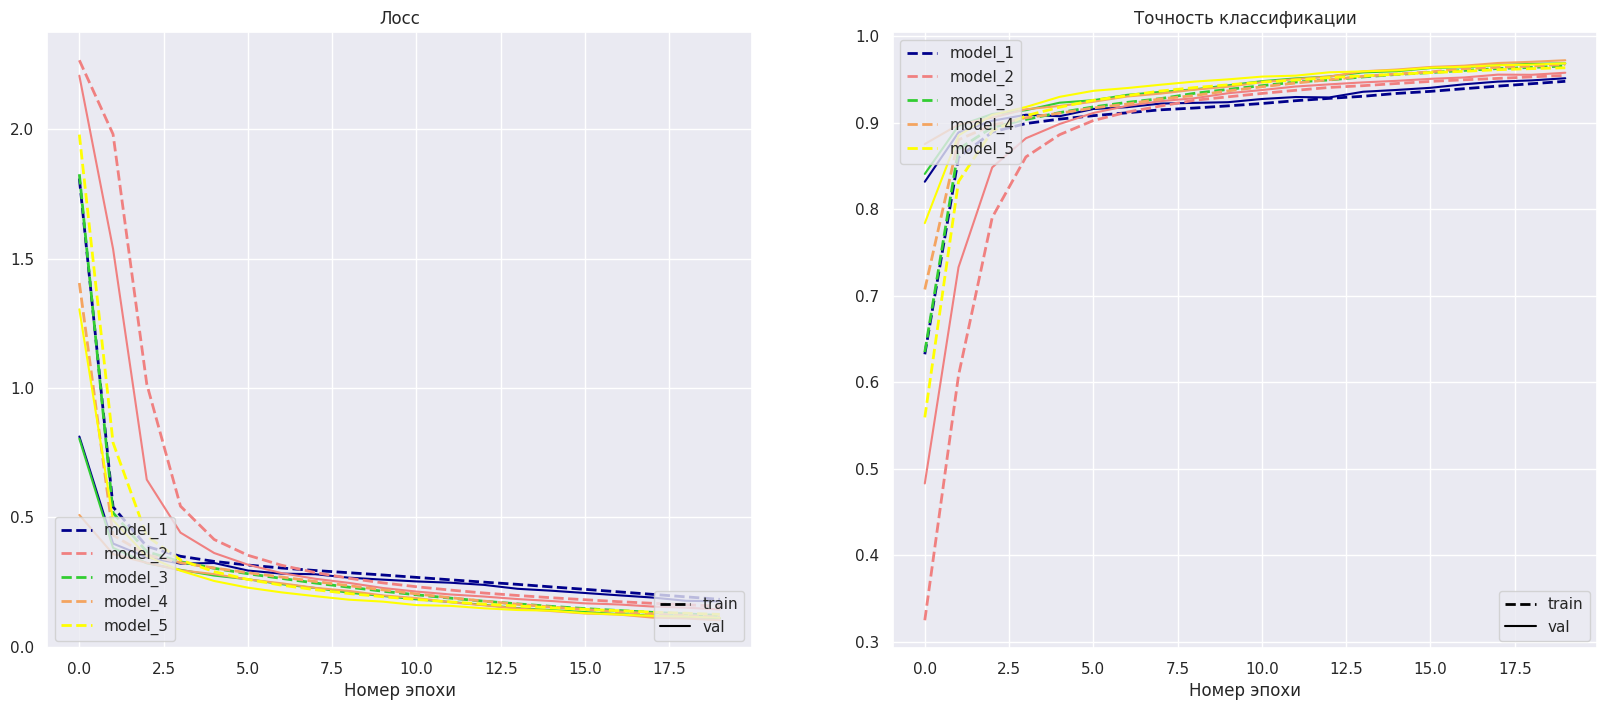

In [35]:
plot_histories([history_1[0], history_1[1], history_1[2], history_1[3], history_1[4]], \
               ["model_1", "model_2", "model_3", "model_4", "model_5"], tuple([20, 8]))

Сделайте вывод. Как размеры ядер влияют на качество и время обучения?

**Вывод по эксперименту 2:**

- Модели с большим количеством параметров по три миллиона не оправдали себя время на обучения большое результат не сильно лучше 2 модели.

- Лучше всего себя показали 2 и 5 модели, идея в них была одинакова сначало проходимся малинким ядром с малиньким шагом (3, 1), а потом большим с большим шагом, чтоб обобщить полученый выход с первого свёрточного слоя.

- Без условно можно было бы добавить ещё 10 эпох 2 модели и дообучить её до 97% но мы возьмём 5 так как у неё в 2 раза меньше параметров

**Анализ лучшей модели.** Выберите лучшую конфигурацию из всех по accuracy на валидации. Она должна быть не меньше 97%.

In [36]:
the_best_model = models_1[4]

Проведите еще один проход валидации выбранной моделью по всему датасету. В нем посчитайте точность по каждому классу и соберите информацию о неправильных предсказаниях. Равномерна ли точность по отношению к классам? Покажите 10-20 примеров, на которых нейросеть выдала неправильную метку. Что можно о них сказать?

In [37]:
full_dataset = ConcatDataset([train_dataset, val_dataset])

In [38]:
val_loader = DataLoader(full_dataset, batch_size=32, shuffle=False)

the_best_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = the_best_model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


Общая точность

In [39]:
overall_accuracy = accuracy_score(all_labels, all_preds)
print(f'Общая точность: {overall_accuracy:.4f}')

Общая точность: 0.9724


Матрица ошибок

In [40]:
cm = confusion_matrix(all_labels, all_preds)


Точность по каждому классу

In [42]:
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, acc in enumerate(class_accuracies):
    print(f'Точность для класса {i}: {acc:.4f}')

Точность для класса 0: 0.9897
Точность для класса 1: 0.9874
Точность для класса 2: 0.9662
Точность для класса 3: 0.9647
Точность для класса 4: 0.9790
Точность для класса 5: 0.9704
Точность для класса 6: 0.9766
Точность для класса 7: 0.9681
Точность для класса 8: 0.9610
Точность для класса 9: 0.9592


Визуализация первых 20 неправильных предсказаний

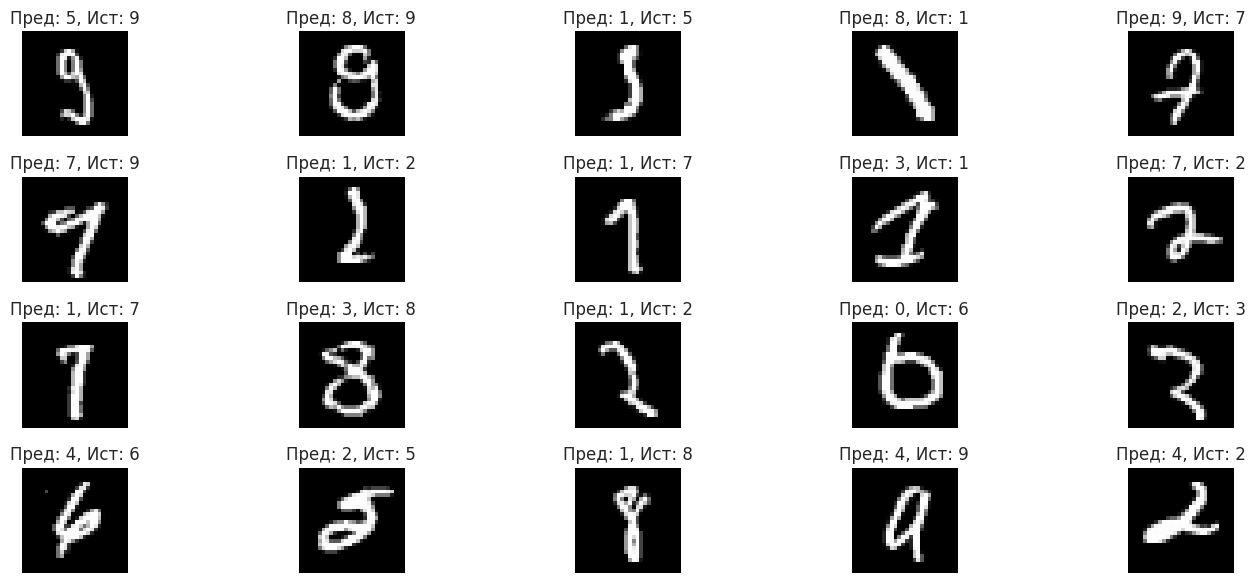

In [43]:
incorrect_indices = [i for i, (pred, true) in enumerate(zip(all_preds, all_labels)) if pred != true]

num_examples = 20
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
axes = axes.flatten()

for i, idx in enumerate(incorrect_indices[:num_examples]):
    img, true_label = full_dataset[idx]
    pred_label = all_preds[idx]
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f'Пред: {pred_label}, Ист: {true_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Ответ:**

- Хуже всего модель предсказывает класс 9

- В целом можно сделать вывод что точности равномерны в прееделах от 0.95-0.98

- На выведеных примерах ошибок мы можем видить что модель путает 9 с 7 8 4 ... Но это связано с двояким трактованием например на 2 изображении и человек бы подумал что 8 как и на шестом что 7.

- В целом примеры не всегда однозначны и довольно плохо написаны с точки зрения хорошего почерка (даже если бы их распозновал человек не всегда угадал бы). 

**Вывод по всей задаче:**

- В свёрточных слоях стоит кобинировать большие и маленькие ядра прохода

- Много параметров не всегда хорошо

- Модель с большой вероятностью предсказывает верный результат, самая большая проблема с 9 возможно стоит добавить больше примеров для неё.

На <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">первом занятии</a> мы рассматривали классификацию с помощью KNN, который показал высокую точность — 99%. Возникает вопрос: зачем нам изучать более сложные методы, если простой KNN может работать так же хорошо или даже лучше? Но здесь есть обман. В чем он заключается?

*Для ответа на вопрос вспомните, с чем мы работали на первом занятии.*

- Мы использовали не весь датасет (их было порядка 1000, в сейчас же 60000)

- Мы ограничились урезанной версией этого датасета, размер изображений которой составлял 8х8.

---
### Задача 2. Визуализиция сверточных слоев

Обучите модель, состоящую как минимум из 4 сверточных слоев, на датасете MNIST. **Количество выходных каналов в каждом сверточном слое должно быть равно 32**, а точность на тестовых данных должна достигать 97%. Для создания модели будет удобно использовать `torch.nn.Sequential`.


In [11]:
class CNN32(nn.Module):
    def __init__(self):
        super(CNN32, self).__init__()
        layers = []
        layers.append(nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(32, 32, kernel_size=4, stride=1, padding=2))
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=3))
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        layers.append(nn.Linear(7200, 10))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
summary(CNN32().to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
            Conv2d-3           [-1, 32, 28, 28]           9,248
              ReLU-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 32, 29, 29]          16,416
              ReLU-6           [-1, 32, 29, 29]               0
            Conv2d-7           [-1, 32, 31, 31]          25,632
         MaxPool2d-8           [-1, 32, 15, 15]               0
           Flatten-9                 [-1, 7200]               0
           Linear-10                   [-1, 10]          72,010
Total params: 123,626
Trainable params: 123,626
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.52
Params size (MB): 0.47
Estimated T

Эпоха 30 из 30, затраченное время 11.878 сек.
  лосс на обучении: 	0.071690
  лосс на валидации: 	0.068049
  точность на обучении: 		97.93 %
  точность на валидации: 		97.89 %


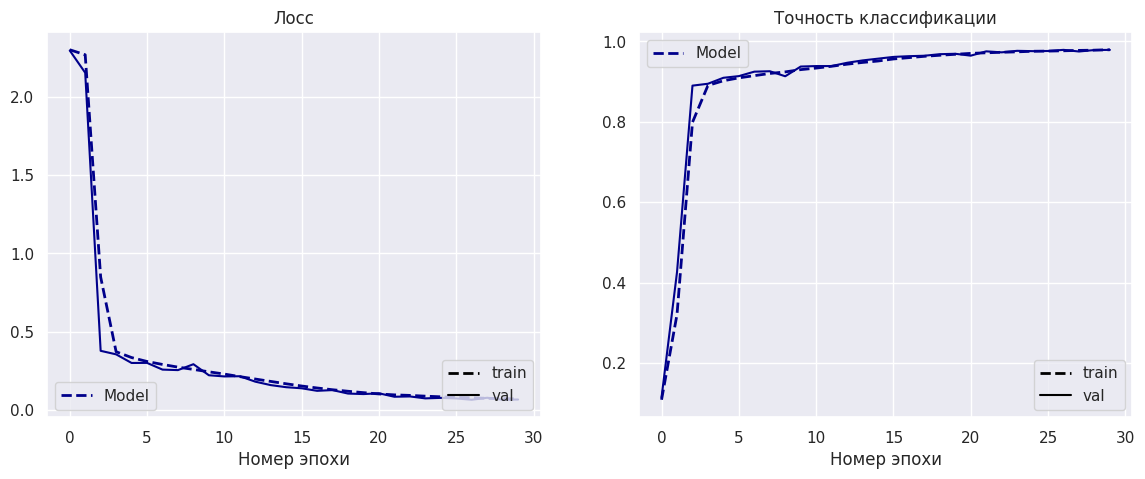

In [19]:
cnn32_model = CNN32()
history_cnn32_model = train_model(cnn32_model, 30)

Визуализируйте веса свертки на первом слое. Поскольку веса имеют размерность $(32, 1, K_1, K_2)$, т.к. входное изображение имеет один канал, вам необходимо отобразить 32 изображения (по количеству выходных каналов) фильтрами размера $K_1 \times K_2$.

*Совет.* Здесь и далее серии из 32 картинок визуализируйте в виде сетки с помощью `plt.subplots(4, 8, figsize=...)`. Не забывайте указывать параметр `cmap='gray'`.

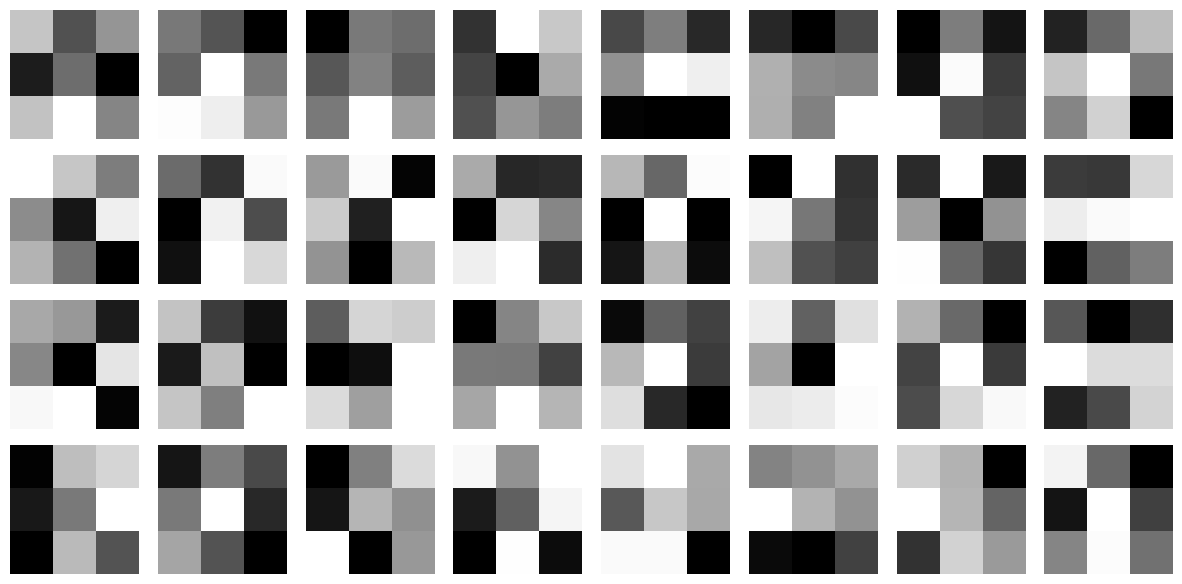

In [20]:
weights = cnn32_model.model[0].weight.data.cpu().numpy()

num_filters = weights.shape[0]

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i in range(num_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(weights[i][0], cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

Какую функцию они могут нести? Для ответа на вопрос вспомните фильтры, рассмотренные на семинаре.

Это похоже на применение оператора Собеля для выделения границ. Веса первого слоя напоминают фильтры, такие как детекторы краев или текстур, которые мы видели на семинаре. Они выделяют простые признаки: горизонтальные, вертикальные или диагональные линии, что помогает модели распознавать базовые элементы цифр.

Для одного произвольного изображения из датасета MNIST визуализируйте выходы **всех слоев** нейросети, включая активацию и пуллинг, вплоть до операции `Flatten`, но не включая её. Каждый выход будет иметь размерность $(32, H_i, W_i)$. Таким образом, для каждого слоя необходимо создать $32$ изображения размером $H_i \times W_i$.

Берем первое изображение

In [21]:
img, _ = val_dataset[0]
img = img.unsqueeze(0).to(device)

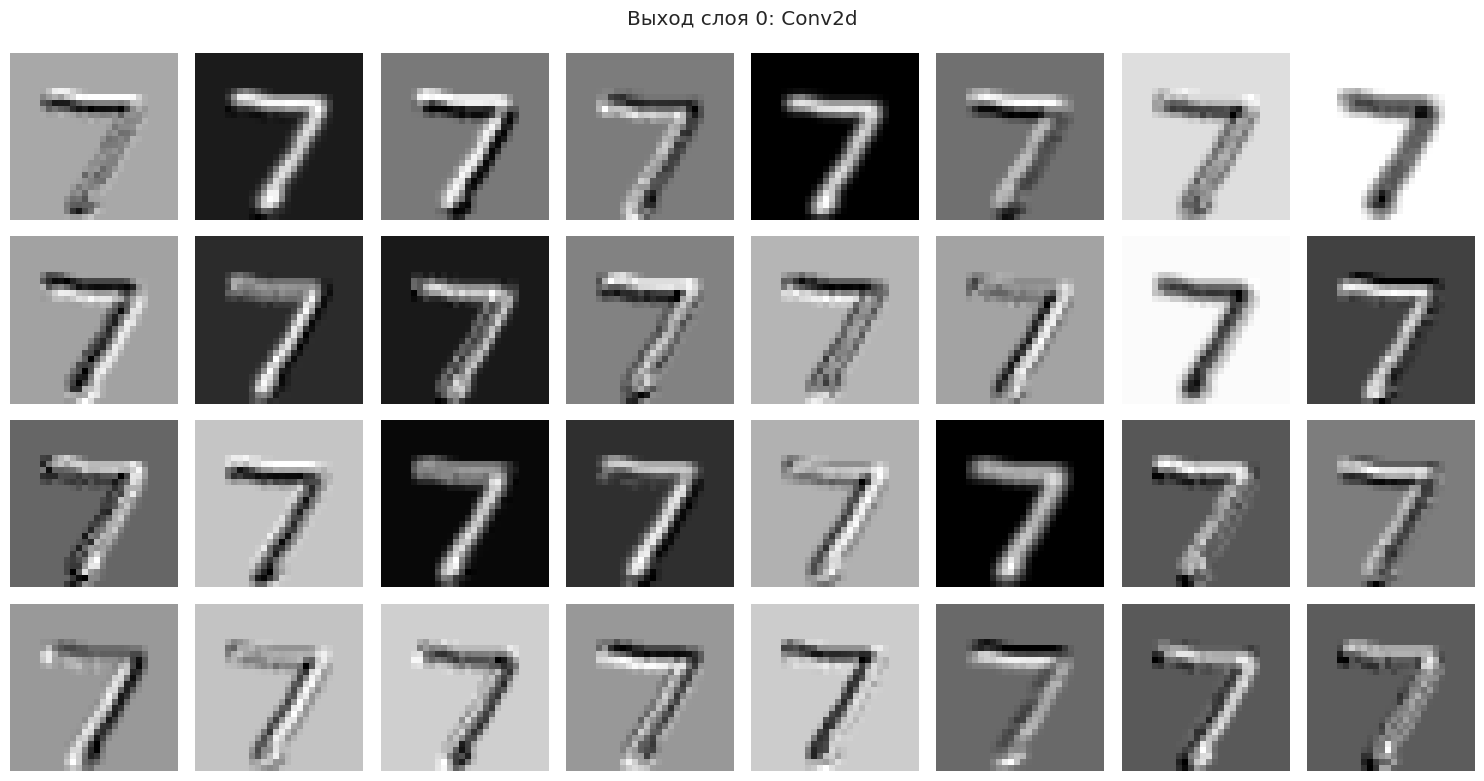

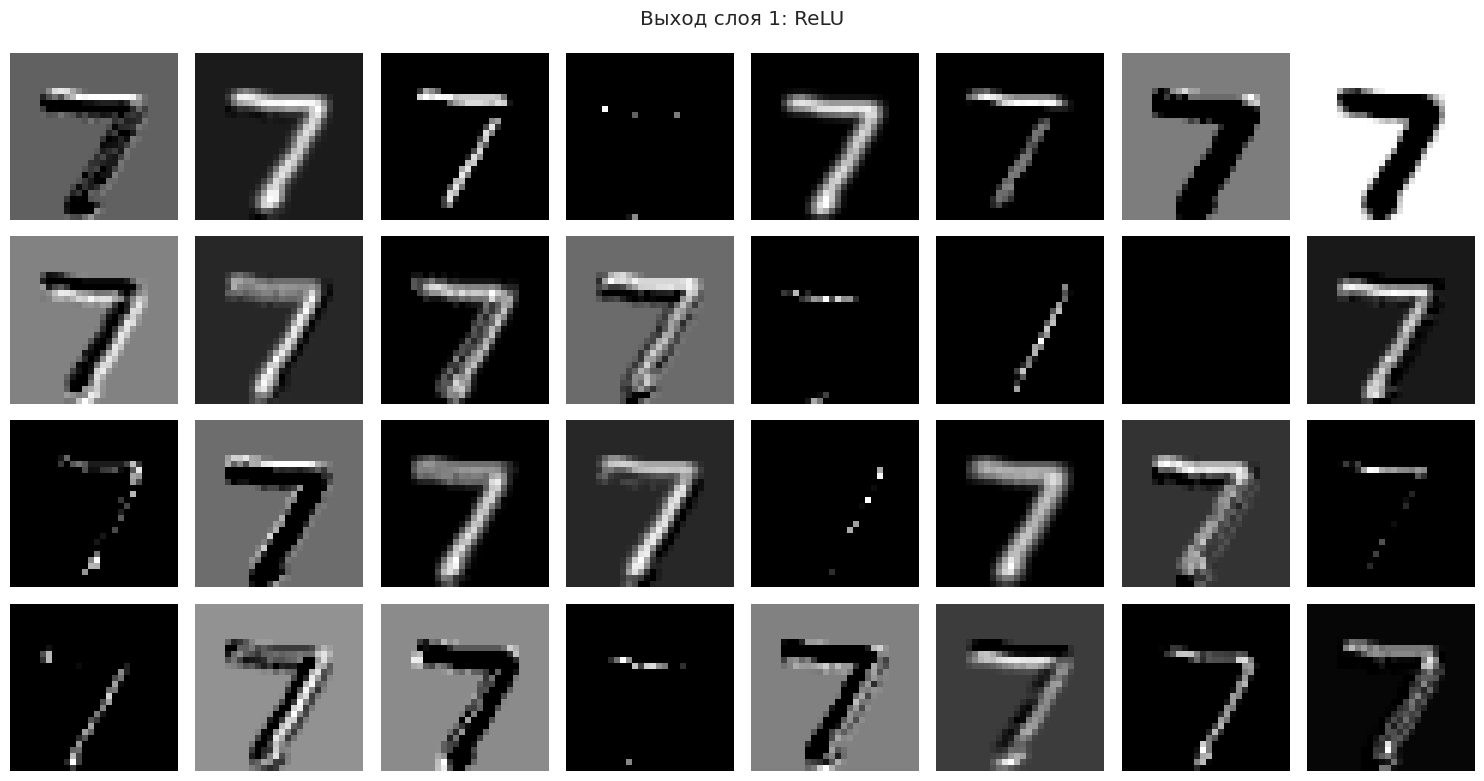

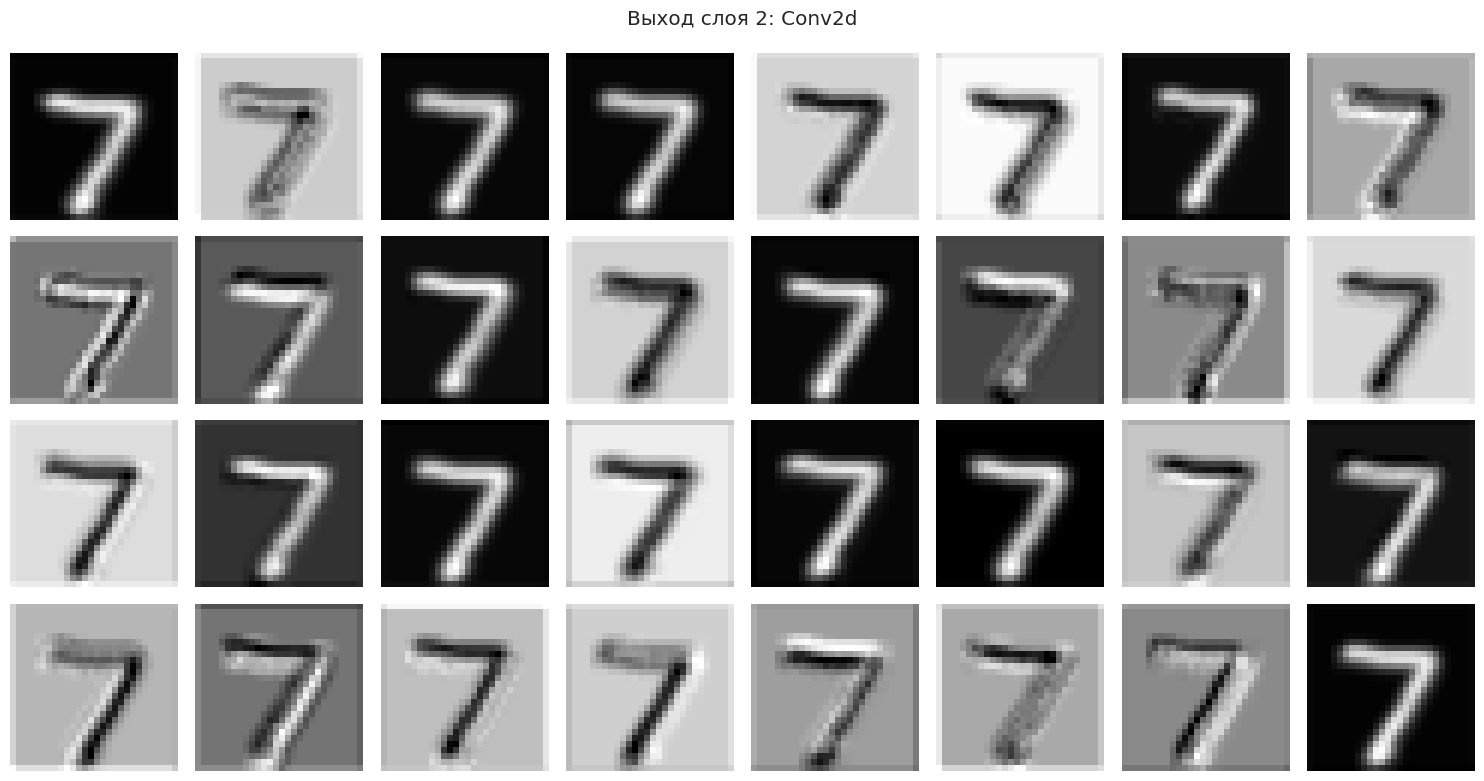

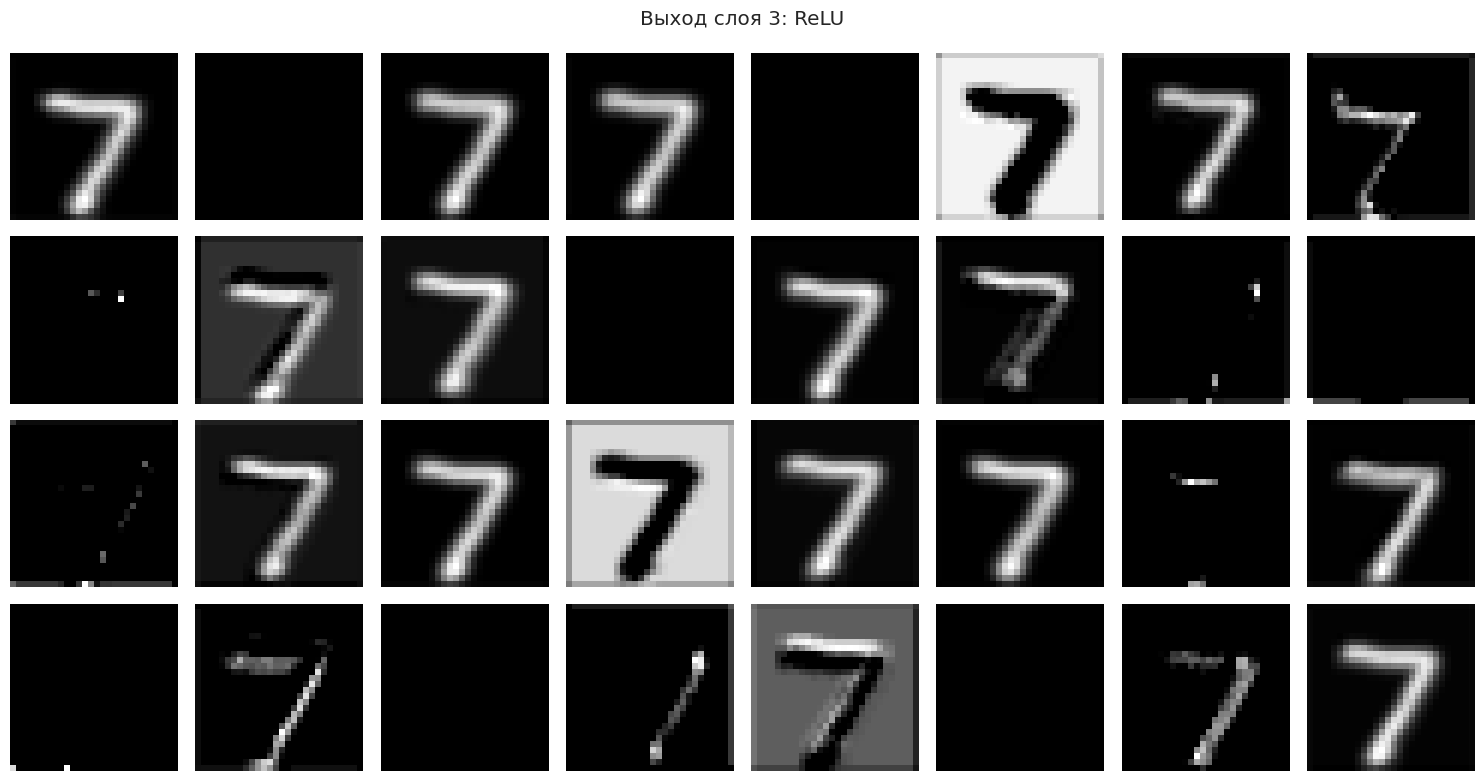

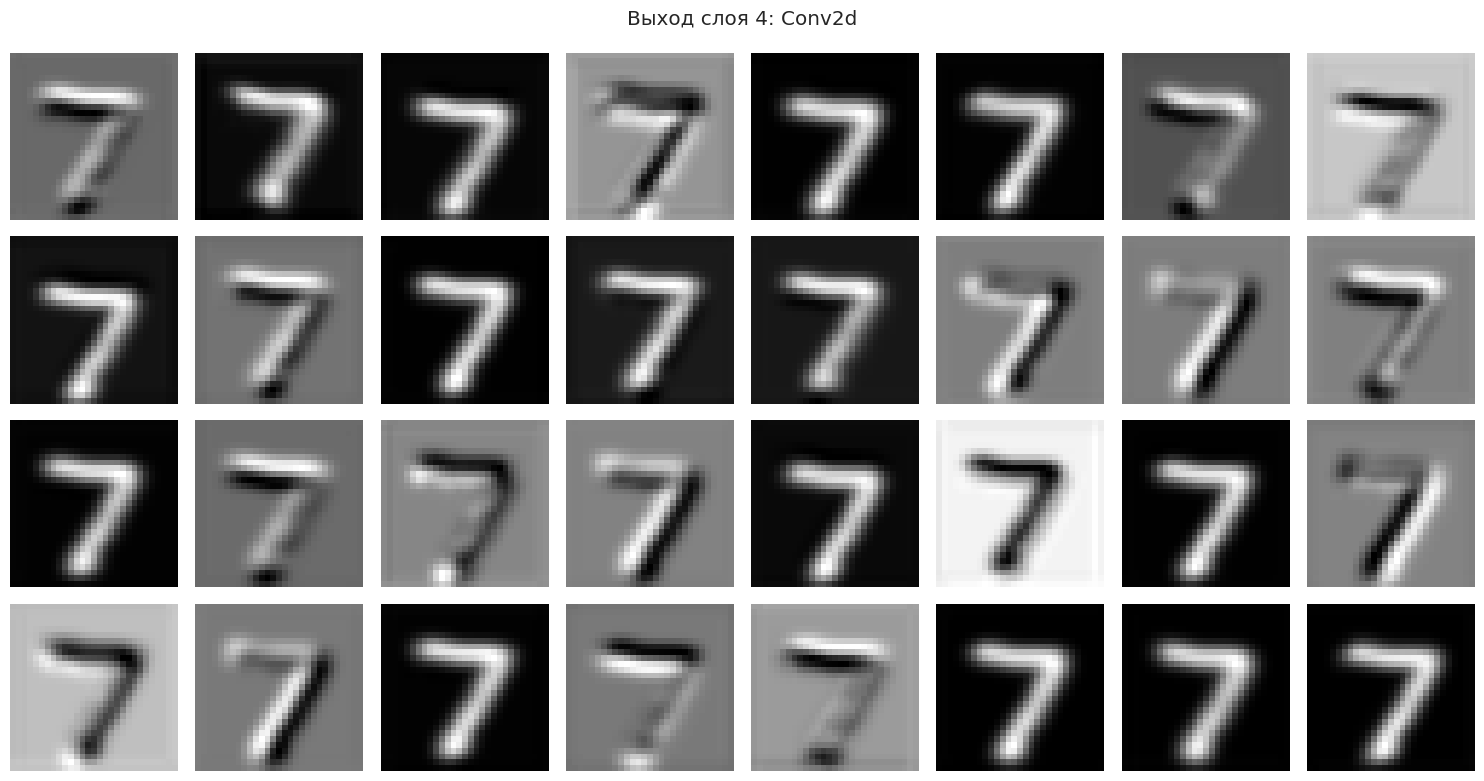

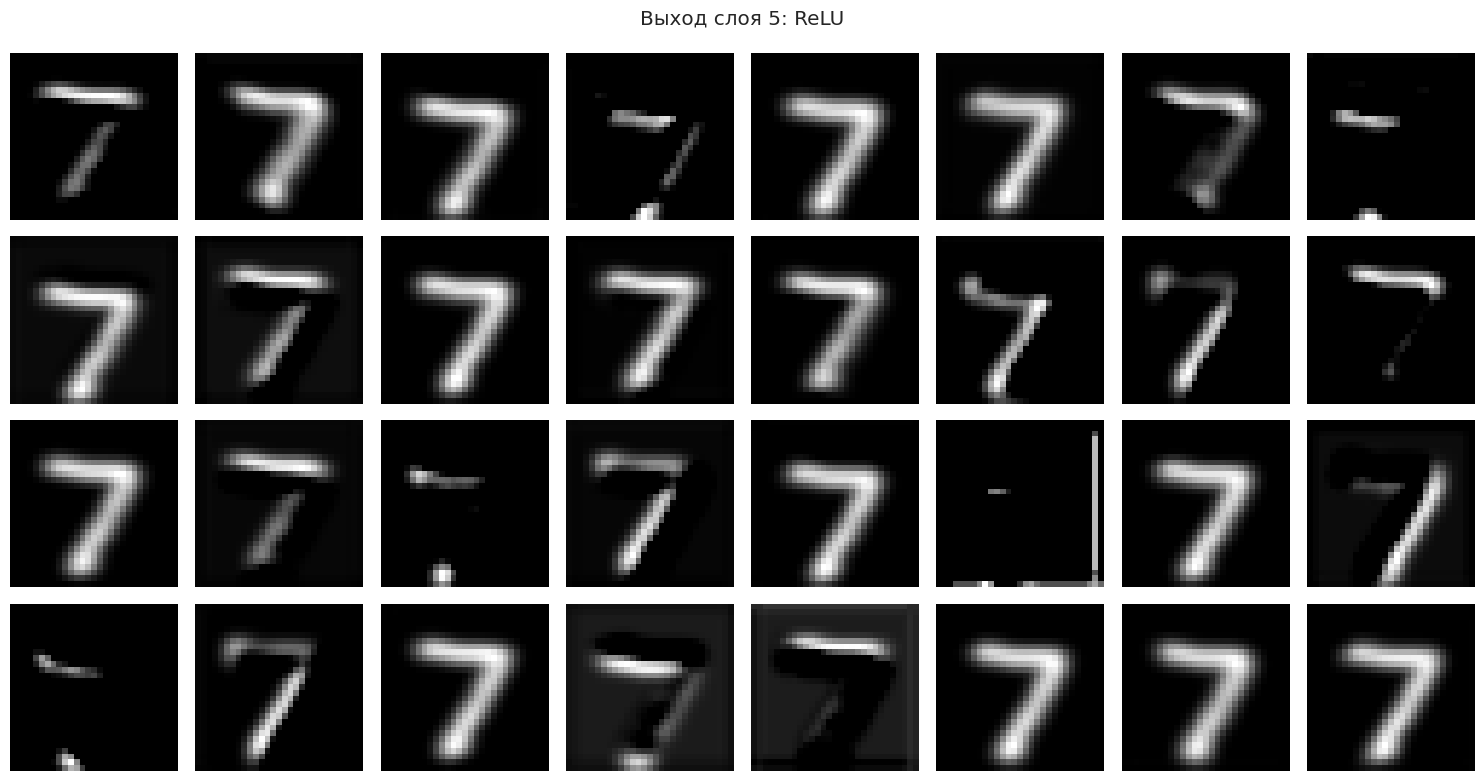

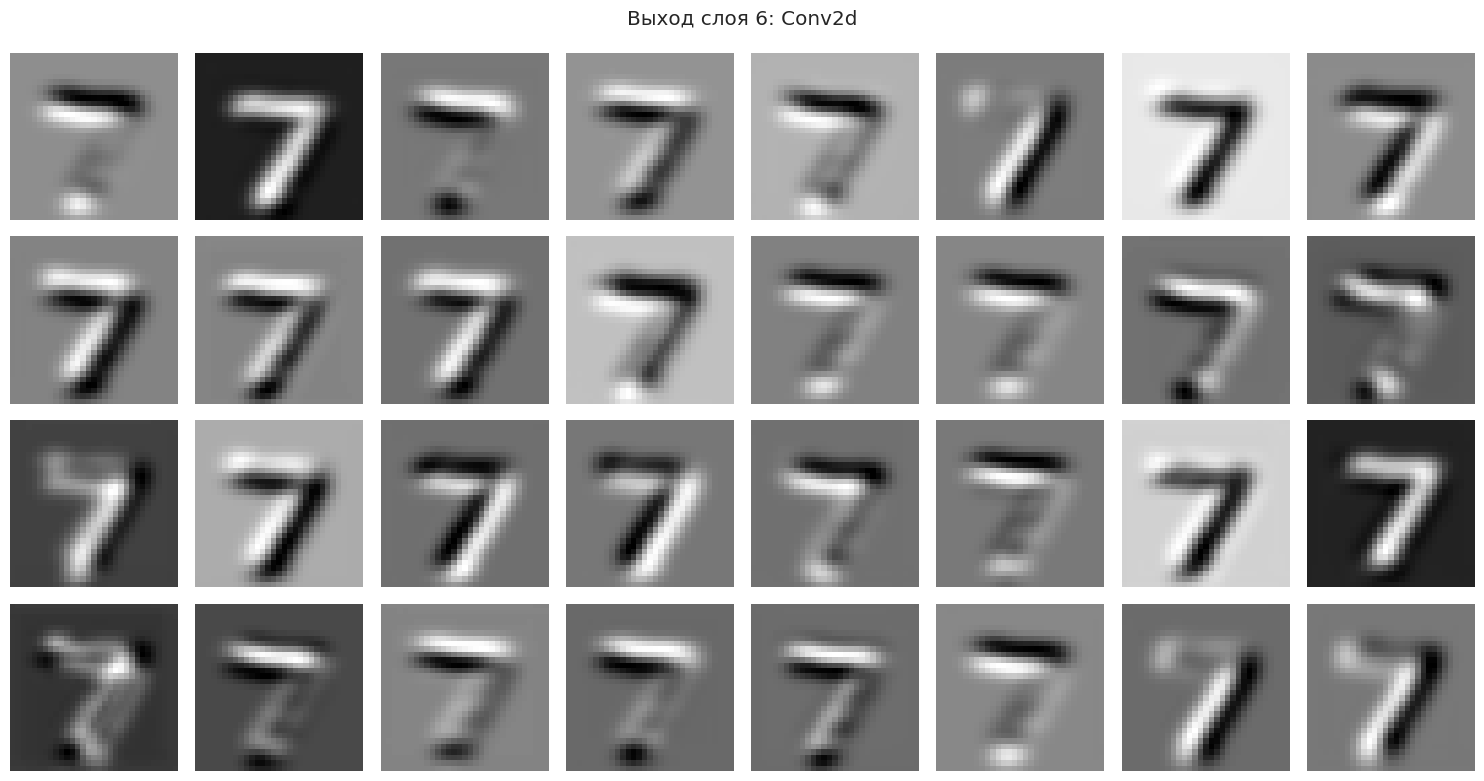

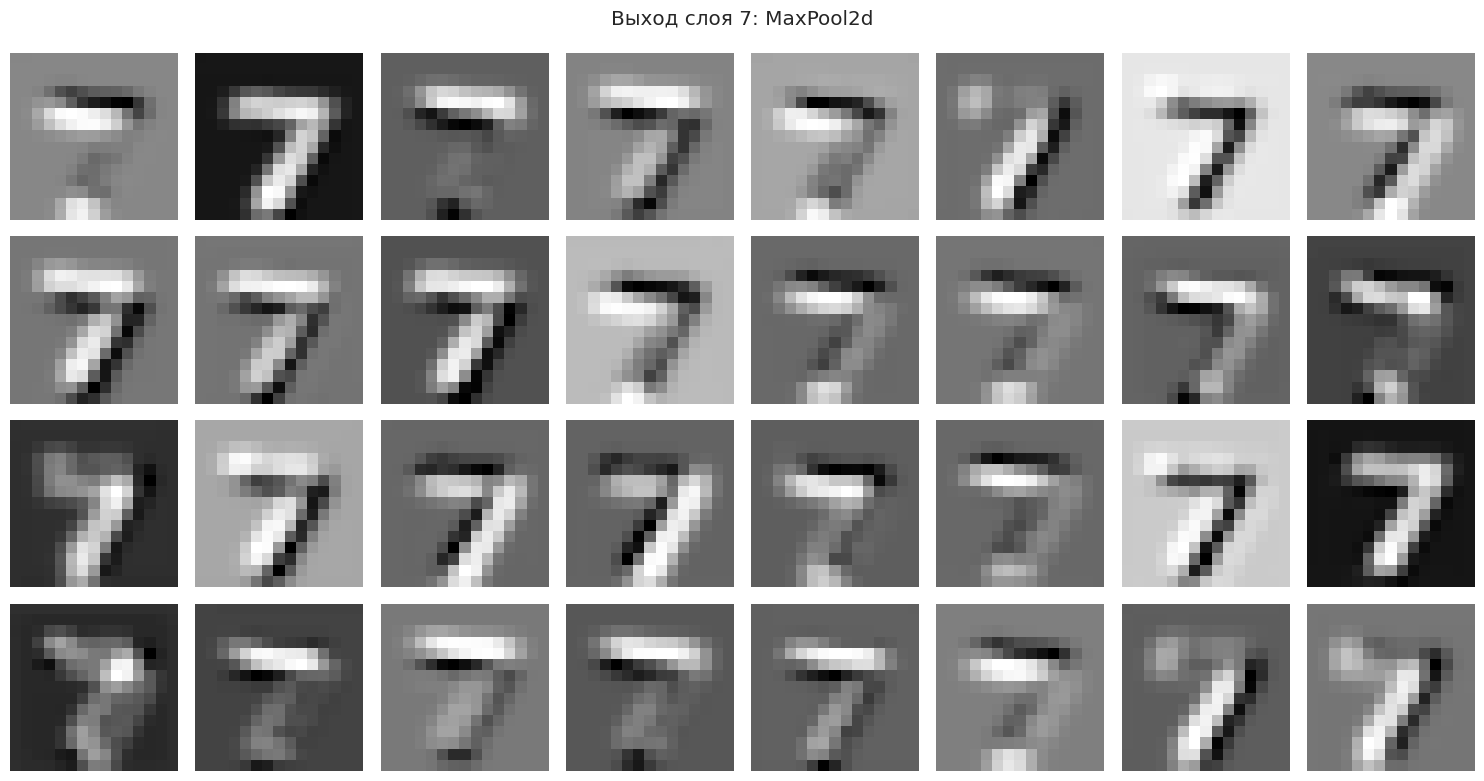

In [22]:
layers = list(cnn32_model.model.children())
output = img
for i, layer in enumerate(layers):
    output = layer(output)
    if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.MaxPool2d) or isinstance(layer, nn.ReLU):
        output_data = output.detach().cpu().numpy()[0]
        fig, axes = plt.subplots(4, 8, figsize=(15, 8))
        axes = axes.flatten()
        for j in range(32):
            axes[j].imshow(output_data[j], cmap='gray')
            axes[j].axis('off')
        plt.suptitle(f'Выход слоя {i}: {layer.__class__.__name__}')
        plt.tight_layout()
        plt.show()

Какие выводы можно сделать о том, как работает ваша сверточная сеть?

- Первый слой выделяет простые признаки (края, линии).

- Последующие слои комбинируют эти признаки в более сложные паттерны (например, части цифр).

- Пуллинг уменьшает размерность, сохраняя важные особенности, что помогает обобщению.

Визуализируйте, какие объекты, подаваемые на вход нейросети, в наибольшей степени активируют нейроны в сверточных слоях. Для этого оптимизируйте изображение, чтобы максимизировать выход нейрона.

Ниже представлен шаблон функции, которая находит изображение, максимально усиливающее реакцию нейрона. Пример можно посмотреть в <a href="https://thetahat.ru/files/ad/main/5/lec5.pdf" target="_blank">презентации</a> с занятия.

In [38]:
# При реализации запрещено пользоваться ИИ-инструментами.


def visualize_filter(
        model: nn.Module,
        layer_index: int,
        target_kernel: int,
        learning_rate: float = 1,
        steps: int = 10_000,
        image_size: int = 28,
        device: Union[str, torch.device] = "cpu",
) -> torch.Tensor:
    """
    Визуализирует фильтр сверточного слоя нейронной сети путем оптимизации
    входного изображения, которое максимизирует активацию заданного фильтра.

    Параметры:
        model (nn.Module): Модель нейронной сети, содержащая целевой сверточный слой.
        layer_index (int): Индекс целевого сверточного слоя в модели (по порядку в model.children()).
        target_kernel (int): Индекс фильтра в целевом слое для визуализации.
        learning_rate (float, optional): Скорость обучения для оптимизатора. По умолчанию 1.
        steps (int, optional): Количество шагов оптимизации. По умолчанию 10000.
        image_size (int, optional): Размер стороны квадратного входного изображения. По умолчанию 28.
        device (str|torch.device, optional): Устройство для вычислений ('cpu' или 'cuda'). По умолчанию "cpu".

    Возвращает:
        torch.Tensor: Оптимизированное изображение (тензор формы [1, C, H, W]),
                     которое максимизирует активацию целевого фильтра.
    """

    # Переводим модель в режим оценки и на нужное устройство
    model.eval().to(device)

    # Инициализируем изображение случайным шумом.
    input_img = torch.randn(1, 1, image_size, image_size, requires_grad=True, device=device)

    # Оптимизируем именно входное изображение, поэтому передаем его параметры оптимизатору
    optimizer = optim.SGD([input_img], lr=learning_rate)

    layers = list(model.model.children())
    for step in range(steps):
        output = input_img
        for i, layer in enumerate(layers):
            output = layer(output)
            if i == layer_index and isinstance(layer, nn.Conv2d):
                break

        # Так как мы хотим максимизировать активацию, а оптимизатор минимизирует функцию потерь,
        # определим loss как отрицательное значение целевой активации.
        loss = -output[0, target_kernel].mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Ограничиваем значения пикселей, чтобы они оставались в разумных пределах.
        input_img.data = torch.clamp(input_img.data, -1, 1)

         # Логируем лосс
        if step % 500 == 0:
            print(f"Шаг {step}/{steps}, Loss: {loss.item():.4f}")

    return input_img.detach().cpu()

Шаг 0/10000, Loss: 0.0616
Шаг 500/10000, Loss: 0.0450
Шаг 1000/10000, Loss: 0.0293
Шаг 1500/10000, Loss: 0.0156
Шаг 2000/10000, Loss: 0.0042
Шаг 2500/10000, Loss: -0.0056
Шаг 3000/10000, Loss: -0.0130
Шаг 3500/10000, Loss: -0.0199
Шаг 4000/10000, Loss: -0.0264
Шаг 4500/10000, Loss: -0.0324
Шаг 5000/10000, Loss: -0.0382
Шаг 5500/10000, Loss: -0.0433
Шаг 6000/10000, Loss: -0.0481
Шаг 6500/10000, Loss: -0.0526
Шаг 7000/10000, Loss: -0.0568
Шаг 7500/10000, Loss: -0.0607
Шаг 8000/10000, Loss: -0.0643
Шаг 8500/10000, Loss: -0.0677
Шаг 9000/10000, Loss: -0.0708
Шаг 9500/10000, Loss: -0.0736


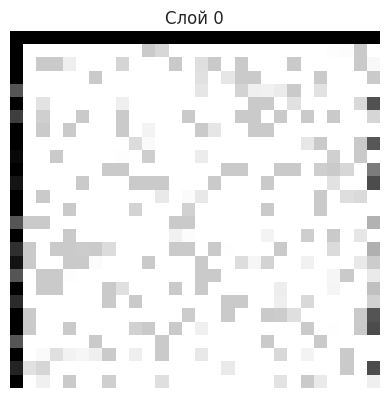

Шаг 0/10000, Loss: -0.2151
Шаг 500/10000, Loss: -0.3313
Шаг 1000/10000, Loss: -0.4040
Шаг 1500/10000, Loss: -0.4449
Шаг 2000/10000, Loss: -0.4713
Шаг 2500/10000, Loss: -0.4908
Шаг 3000/10000, Loss: -0.5072
Шаг 3500/10000, Loss: -0.5207
Шаг 4000/10000, Loss: -0.5302
Шаг 4500/10000, Loss: -0.5373
Шаг 5000/10000, Loss: -0.5428
Шаг 5500/10000, Loss: -0.5469
Шаг 6000/10000, Loss: -0.5499
Шаг 6500/10000, Loss: -0.5529
Шаг 7000/10000, Loss: -0.5554
Шаг 7500/10000, Loss: -0.5574
Шаг 8000/10000, Loss: -0.5589
Шаг 8500/10000, Loss: -0.5603
Шаг 9000/10000, Loss: -0.5616
Шаг 9500/10000, Loss: -0.5628


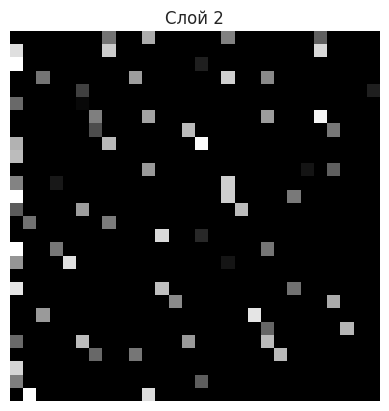

Шаг 0/10000, Loss: -0.8132
Шаг 500/10000, Loss: -5.3210
Шаг 1000/10000, Loss: -5.3746
Шаг 1500/10000, Loss: -5.3757
Шаг 2000/10000, Loss: -5.3757
Шаг 2500/10000, Loss: -5.3757
Шаг 3000/10000, Loss: -5.3757
Шаг 3500/10000, Loss: -5.3757
Шаг 4000/10000, Loss: -5.3757
Шаг 4500/10000, Loss: -5.3757
Шаг 5000/10000, Loss: -5.3757
Шаг 5500/10000, Loss: -5.3757
Шаг 6000/10000, Loss: -5.3757
Шаг 6500/10000, Loss: -5.3757
Шаг 7000/10000, Loss: -5.3757
Шаг 7500/10000, Loss: -5.3757
Шаг 8000/10000, Loss: -5.3757
Шаг 8500/10000, Loss: -5.3757
Шаг 9000/10000, Loss: -5.3757
Шаг 9500/10000, Loss: -5.3757


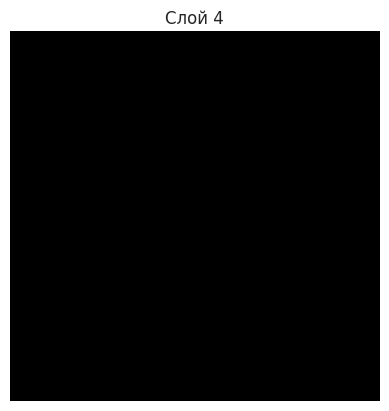

Шаг 0/10000, Loss: 0.0029
Шаг 500/10000, Loss: -0.0539
Шаг 1000/10000, Loss: -0.0635
Шаг 1500/10000, Loss: -0.0712
Шаг 2000/10000, Loss: -0.0776
Шаг 2500/10000, Loss: -0.0831
Шаг 3000/10000, Loss: -0.0880
Шаг 3500/10000, Loss: -0.0932
Шаг 4000/10000, Loss: -0.0975
Шаг 4500/10000, Loss: -0.1016
Шаг 5000/10000, Loss: -0.1054
Шаг 5500/10000, Loss: -0.1086
Шаг 6000/10000, Loss: -0.1117
Шаг 6500/10000, Loss: -0.1148
Шаг 7000/10000, Loss: -0.1180
Шаг 7500/10000, Loss: -0.1214
Шаг 8000/10000, Loss: -0.1247
Шаг 8500/10000, Loss: -0.1277
Шаг 9000/10000, Loss: -0.1305
Шаг 9500/10000, Loss: -0.1330


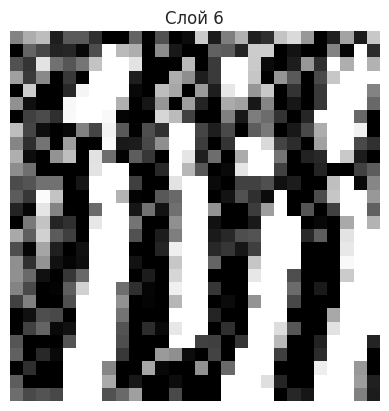

In [39]:
for layer_idx in [0, 2, 4, 6]:
    img = visualize_filter(cnn32_model, layer_idx, 5)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'Слой {layer_idx}')
    plt.axis('off')
    plt.show()

Сделайте выводы о том, как с глубиной слоя меняется способность нейрона видеть различные паттерны на изображении.

- На первых слоях активируются простые паттерны (линии, углы).

- На более глубоких слоях паттерны становятся сложнее, отражая комбинации признаков, что показывает способность сети к иерархическому обучению.

---
### Задача 3. Перенос стиля

*Данную задачу, возможно, проще сделать в Google Colab.*

В данной задаче вы потренируетесь в работе с картинками и составлением промптов. Используя код с <a href="https://thetahat.ru/files/ad/main/5/cv_complex_examples" target="_blank">семинара</a>, проведите перенос стиля на хотя бы 3 своих примерах.

> Заметьте, что в примерах с семинара в качестве картинок стиля и контента использовались картинки среднего разрешения. Если возникают проблемы, например:
> * оптимизация останавливается на 0-й эпохе и не создает картинку;
> * loss в какой-то момент стал nan;
> * нехватка RAM;
>
> то либо уменьшите разрешение ваших картинок, либо попробуйте картинку полегче.

In [68]:
!git clone https://github.com/nazianafis/Neural-Style-Transfer
# Перейдем в директорию скачанного репозитория
%cd Neural-Style-Transfer/

# Небольшая обработка скрипта, не менять!
file_path = "NST.py"
with open(file_path, "r") as file:
    # Убираем автоматический запуск
    lines = file.readlines()[:183]
# Вывод логов только каждые 100 эпох
lines = lines[:175] + ["            if cnt % 100 == 0:\n"] + lines[175:]
lines[176] = "    " + lines[176]
with open(file_path, "w") as file:
    file.writelines(lines)

from NST import *

Cloning into 'Neural-Style-Transfer'...
remote: Enumerating objects: 379, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 379 (delta 72), reused 105 (delta 34), pack-reused 225 (from 1)
Receiving objects: 100% (379/379), 92.21 MiB | 51.29 MiB/s, done.
Resolving deltas: 100% (143/143), done.
/kaggle/working/Neural-Style-Transfer


In [76]:
def run_neural_style_transfer(content_image="c1.jpg", style_image="s1.jpg"):
    """
    Функция для запуска метода Neural Style Transfer.

    :param content_image: имя файла картинки контента
    :param style_image: имя файла картинки стиля
    :return: results_path -- путь к папке, в которую сохранился результат
    """
    PATH = "/kaggle/working/Neural-Style-Transfer/"
    default_resource_dir = os.path.join(PATH, "data")
    content_images_dir = os.path.join(default_resource_dir, "content-images")
    style_images_dir = os.path.join(default_resource_dir, "style-images")
    output_img_dir = os.path.join(default_resource_dir, "output-images")
    img_format = (4, ".jpg")

    # Задаем конфиги, включая вес компонент лосса
    optimization_config = {
        "content_img_name": content_image,
        "style_img_name": style_image,
        "height": 400,
        "content_weight": 100000.0,
        "style_weight": 30000.0,
        "tv_weight": 1.0,
    }
    optimization_config["content_images_dir"] = content_images_dir
    optimization_config["style_images_dir"] = style_images_dir
    optimization_config["output_img_dir"] = output_img_dir
    optimization_config["img_format"] = img_format

    print(content_images_dir, style_images_dir, output_img_dir)

    results_path = neural_style_transfer(optimization_config)
    return results_path

In [132]:
def visualize_style_transfer(content_image, style_image, results_path):
    """
    Визуализация результатов.

    :param content_image: имя файла картинки контента
    :param style_image: имя файла картинки стиля
    :param results_path: путь к папке, в которую сохранился результат
    """
    if len(os.listdir(results_path)) == 0:
        return
    plt.figure(figsize=(13, 3))
    folders = [
        "content-images/",
        "output-images/" + Path(results_path).name + "/",
        "style-images/",
    ]
    combined_image = (
        Path(content_image).stem + "_" + Path(style_image).stem + ".jpg"
    )
    
    files = [content_image, combined_image, style_image]
    titles = ["Контент", "Результат", "Стиль"]
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        print("data/" + folders[i] + files[i])
        plt.imshow(plt.imread("data/" + folders[i] + files[i]))
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])



Теперь для каждой пары контекст-стиль попытайтесь сгенерировать картинку с таким контекстом и стилем с помощью диффузионной модели, рассмотренной на семинаре, задав нужный промпт.

In [164]:
content_images = sorted(os.listdir("/kaggle/working/Neural-Style-Transfer/data/content-images"))
style_images = sorted(os.listdir("/kaggle/working/Neural-Style-Transfer/data/style-images"))
result_paths = []

In [165]:
for content_image, style_image in zip(content_images, style_images):
    print(content_image, style_image)
    results_path = run_neural_style_transfer(content_image, style_image)
    result_paths.append(results_path)

1c.jpg 1s.jpg
/kaggle/working/Neural-Style-Transfer/data/content-images /kaggle/working/Neural-Style-Transfer/data/style-images /kaggle/working/Neural-Style-Transfer/data/output-images
Using VGG19 in the optimization procedure.
L-BFGS | iteration: 000, total loss=3143789445120.0000, content_loss=      0.0000, style loss=3143778000000.0000, tv loss=11590943.0000
L-BFGS | iteration: 100, total loss=6449636352.0000, content_loss=2082838671.8750, style loss=4334738906.2500, tv loss=32058678.0000
L-BFGS | iteration: 200, total loss=3340354560.0000, content_loss=1919509960.9375, style loss=1388428476.5625, tv loss=32416192.0000
L-BFGS | iteration: 300, total loss=2730283776.0000, content_loss=1822820898.4375, style loss=874745566.4062, tv loss=32717368.0000
L-BFGS | iteration: 400, total loss=2478762240.0000, content_loss=1763770898.4375, style loss=682047363.2812, tv loss=32943776.0000
L-BFGS | iteration: 500, total loss=2350357248.0000, content_loss=1723204101.5625, style loss=594169687.50

data/content-images/1c.jpg
data/output-images/combined_1c_1s/1c_1s.jpg
data/style-images/1s.jpg
data/content-images/2с.jpg
data/output-images/combined_2с_2s/2с_2s.jpg
data/style-images/2s.jpg
data/content-images/3с.jpg
data/output-images/combined_3с_3s/3с_3s.jpg
data/style-images/3s.jpg


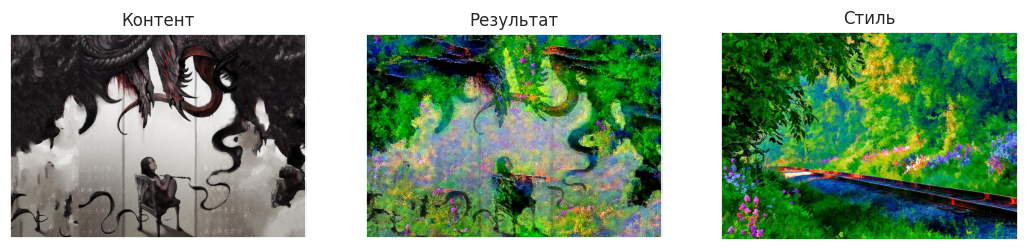

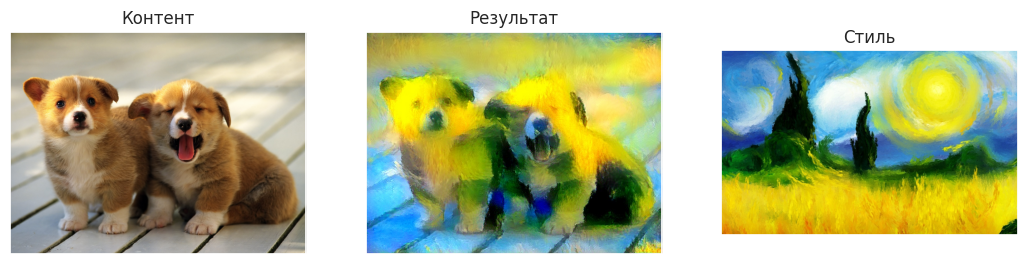

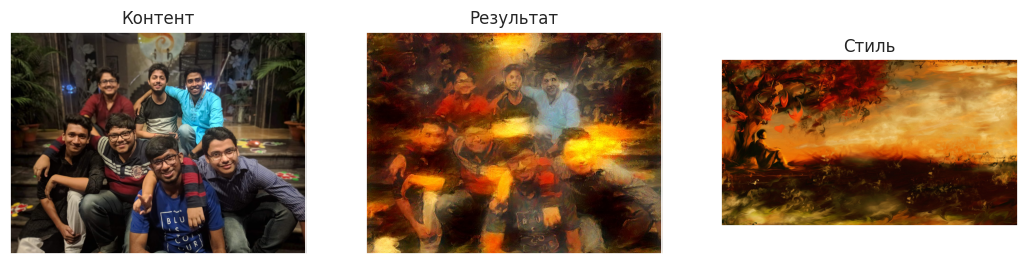

In [166]:
for content_image, style_image, results_path in zip(
    content_images, style_images, result_paths
):
    visualize_style_transfer(content_image, style_image, results_path)

**Вывод:**

- Перенос стиля сохраняет структуру контента, добавляя текстуры стиля.

- Диффузионные модели генерируют изображения с нуля, что дает больше свободы, но может не точно воспроизводить контент.